# 0-载入包

In [1]:
#注意添加注释
#2024-10-09：从此程序开始，对每一个程序，设立两个文档：比如7-CNRDS.ipynb是实际操作记录。7-CNRDS-exe.ipynb最后执行文档

In [2]:
library(tidyverse)
library(data.table)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'data.table'


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [228]:
library(ggplot2)
library(patchwork)

In [3]:
library(microbenchmark)

# 8-分支机构数据

## 8.1-读入.csv文件-entry

In [4]:
# Set the base path and file details
#进入有3个.csv文件。退出只有一个.csv文件。
base_path <- "D:/IDMhs/CNRDS-机构设立情况-2024-09-19-csv/"
file_prefix <- "机构设立情况_"
number_range <- 1:3
file_extension <- ".csv"

base_path2 <- "D:/IDMhs/CNRDS-机构退出情况-2024-09-22-csv/"
file_prefix2 <- "机构退出情况.csv"
file_name2 = paste0(base_path2, file_prefix2)


In [5]:
# Create a son function to read a single CSV file
read_csv_file0 <- function(file_name) {
  # Read the header separately
  header <- read_csv(file_name, n_max = 1, col_names = FALSE)
  
  # Read the data, skipping the first two rows
  df <- read_csv(file_name, 
                 col_names = FALSE,
                 skip = 2)
  
  # Set the column names from the header
  colnames(df) <- as.character(header[1,])
  
  return(df)
}

In [6]:
# Create a function to read a single CSV file
read_csv_file <- function(file_number) {
  file_na <- paste0(base_path, file_prefix, file_number, file_extension)
  df=read_csv_file0(file_na)
  return(df)
}

In [7]:
# Read all CSV files and combine them into a single data frame
#读入之后合并 
Ins_entry <- map_df(number_range, read_csv_file)

Rows: 1 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): X1, X2, X3, X4, X5, X6, X7

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 100000 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): X1, X2, X3, X4, X5
date (2): X6, X7

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): X1, X2, X3, X4, X5, X6, X7

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 100000 Columns: 7
── Column specification ───────────────────

In [8]:
# Print the dimensions of the combined data frame
print(paste("Dimensions of the combined data frame:", 
            nrow(Ins_entry), "rows and", ncol(Ins_entry), "columns"))

[1] "Dimensions of the combined data frame: 279588 rows and 7 columns"


In [9]:
# Display the first few rows of the combined data frame
print(head(Ins_entry))

# Display the column names
#print(colnames(Ins_entry))

# Display the structure of the combined data frame
#str(Ins_entry)

# A tibble: 6 × 7
  Inscode         Intype     Insname       Insadr  Inscity Issdate    Apprdate  
  <chr>           <chr>      <chr>         <chr>   <chr>   <date>     <date>    
1 A0002K244010001 政策性银行 中国农业发展… 广州市… 广东省… 2024-04-26 1996-10-14
2 A0002L315290001 政策性银行 中国农业发展… 内蒙古… 内蒙古… 2024-01-04 1996-09-26
3 A0002L335060001 政策性银行 中国农业发展… 福建省… 福建省… 2024-06-12 1996-12-17
4 A0002L352270001 政策性银行 中国农业发展… 贵州省… 贵州省… 2024-06-03 1996-12-19
5 A0002L365020001 政策性银行 中国农业发展… 新疆维… 新疆维… 2024-04-07 1998-07-08
6 A0002N365020001 政策性银行 中国农业发展… 新疆维… 新疆维… 2024-04-07 1998-07-08


In [10]:
Ins_exit <- read_csv_file0(file_name2)

Rows: 1 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): X1, X2, X3, X4, X5, X6, X7, X8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 38735 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): X1, X2, X3, X4, X5
date (3): X6, X7, X8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
# Print the dimensions of the combined data frame
print(paste("Dimensions of the combined data frame:", 
            nrow(Ins_exit), "rows and", ncol(Ins_exit), "columns"))

[1] "Dimensions of the combined data frame: 38735 rows and 8 columns"


In [12]:
print(head(Ins_exit))

# A tibble: 6 × 8
  Inscode         Intype Insname Insadr Inscity Issdate    Apprdate   Exitdt    
  <chr>           <chr>  <chr>   <chr>  <chr>   <date>     <date>     <date>    
1 A0002L335090002 政策…  中国农… 福建…  福建省… 2007-06-12 1997-03-28 2010-07-28
2 A0002L337130001 政策…  中国农… 临沂…  山东省… 2007-06-22 1996-11-12 2008-11-03
3 A0002N237020001 政策…  中国农… 山东…  山东省… 2007-05-14 1996-09-26 2008-02-21
4 A0002N314020001 政策…  中国农… 大同…  山西省… 2007-04-25 1997-05-07 2015-07-23
5 A0002N314030001 政策…  中国农… 山西…  山西省… 2007-04-24 1997-05-04 2014-02-13
6 A0002N314040001 政策…  中国农… 山西…  山西省… 2007-04-27 1997-04-30 2015-11-17


## 取消-8.2-合并Ins_2

In [13]:
#后来决定不合并。所以全部注释

In [14]:
# Add Exitdt column to Ins_entry  #给Ins_entry增加一列。便于合并两个数据框
# Ins_entry <- Ins_entry %>%
#   mutate(Exitdt = as.Date("2024-12-31"))

In [15]:
# print(head(Ins_entry,3))

In [16]:
# # Merge Ins_entry and Ins_exit
# Ins_2 <- bind_rows(Ins_entry, Ins_exit)

In [17]:
# dim(Ins_2)

## 8.3-生成新列

### 8.3.1-最早成立年份

In [18]:
# Print the row before 1980-01-01
cat("Row with Apprdate before 1980-01-01:\n")
print(Ins_entry %>% filter(Apprdate < as.Date("1980-01-01")))

Row with Apprdate before 1980-01-01:
# A tibble: 10,364 × 7
   Inscode         Intype   Insname         Insadr Inscity Issdate    Apprdate  
   <chr>           <chr>    <chr>           <chr>  <chr>   <date>     <date>    
 1 B0001L243120001 商业银行 中国工商银行股… 湖南…  湖南省… 2007-05-18 1950-01-01
 2 B0001L252010001 商业银行 中国工商银行股… 贵州…  贵州省… 2022-02-28 1972-10-01
 3 B0001L343120001 商业银行 中国工商银行股… 湖南…  湖南省… 2023-05-11 1950-01-01
 4 B0001M212000006 商业银行 中国工商银行股… 天津…  天津市  2022-01-28 1969-01-01
 5 B0001M212000007 商业银行 中国工商银行股… 天津…  天津市  2021-12-02 1973-08-16
 6 B0001S212000019 商业银行 中国工商银行股… 天津…  天津市  2021-12-02 1978-01-01
 7 B0001S212000031 商业银行 中国工商银行股… 天津…  天津市  2022-02-09 1969-01-01
 8 B0001S221020040 商业银行 中国工商银行股… 大连…  辽宁省… 2021-12-24 1954-01-01
 9 B0001S221020090 商业银行 中国工商银行股… 辽宁…  辽宁省… 2021-12-24 1978-03-01
10 B0001S221020097 商业银行 中国工商银行股… 辽宁…  辽宁省… 2021-12-24 1975-12-29
# ℹ 10,354 more rows


In [19]:
# 不知道是什么原因，存在1万多行，成立日期在1980-01-01之前。乃统计1984年之后的分支情况
start_year <- 1984

In [20]:
# Create a sequence of years from start_year to 2024
years <- seq(start_year, 2024)

### 8.3.2-成立时间na处理

In [21]:
# Find rows where Apprdate is NA
na_rows_entry <- Ins_entry %>% filter(is.na(Apprdate))
dim(na_rows_entry)

[1] 6 7

In [22]:
# Find rows where Apprdate is NA
na_rows_exit <- Ins_exit %>% filter(is.na(Apprdate))
dim(na_rows_exit)

[1] 245   8

### 8.3.2b 省份NA处理

In [23]:
#后来发现，在银行分支中，有两个Ins_prov=NA的情况，是 农行、工行的 三沙分行
# 查看NA
na_city_entry = Ins_entry %>% filter(is.na(Inscity))
na_city_exit = Ins_exit %>% filter(is.na(Inscity))

In [24]:
print(na_city_entry)
print(na_city_exit)

# A tibble: 2 × 7
  Inscode         Intype   Insname         Insadr Inscity Issdate    Apprdate  
  <chr>           <chr>    <chr>           <chr>  <chr>   <date>     <date>    
1 B0002L246030001 商业银行 中国农业银行股… NA     NA      2021-08-04 2019-05-28
2 B0003M246030001 商业银行 中国银行股份有… NA     NA      2021-07-30 2016-01-28
# A tibble: 0 × 8
# ℹ 8 variables: Inscode <chr>, Intype <chr>, Insname <chr>, Insadr <chr>,
#   Inscity <chr>, Issdate <date>, Apprdate <date>, Exitdt <date>


### 8.3.3-生成新列-entry2

In [25]:
#结构代码。机构名称。机构类型。机构类型首字母。省份、城市。
#对于Apprdate=NA的行，令Apprdate=Issdate
#报告Inscity=NA的情形，并修改"三沙市"

In [26]:
# process_dataframe <- function(df) {
#   df %>%
#     mutate(
#       Inscode2 = str_sub(Inscode, 1, 5),
#       Insname2 = str_sub(Insname, 1, 6),
#       Intype2 = as.factor(Intype),
#       Intype3 = str_sub(Inscode, 1, 1),
#       Ins_prov = str_replace(Inscity, "-.+$", ""),
#       Ins_city = str_extract(Inscity, "(?<=-).*") %>% 
#                  ifelse(is.na(.), Inscity, .),
#       Apprdate = if_else(is.na(Apprdate), Issdate, Apprdate)
#     )
# }

In [27]:
process_dataframe <- function(df) {
  # Print the name of the dataframe being processed
  df_name <- deparse(substitute(df))
  cat("Processing dataframe:", df_name, "\n\n")

  result <- df %>%
    mutate(
      Inscode2 = str_sub(Inscode, 1, 5),
      Insname2 = str_sub(Insname, 1, 6),
      Intype2 = as.factor(Intype),
      Intype3 = str_sub(Inscode, 1, 1),
      Ins_prov = str_replace(Inscity, "-.+$", ""),
      Ins_city = str_extract(Inscity, "(?<=-).*") %>% 
                 ifelse(is.na(.), Inscity, .),
      Apprdate = if_else(is.na(Apprdate), Issdate, Apprdate)
    ) %>%
    mutate(
      Ins_prov = if_else(is.na(Inscity) & str_detect(Insname, "三沙"), "海南省", Ins_prov),
      Ins_city = if_else(is.na(Inscity) & str_detect(Insname, "三沙"), "三沙市", Ins_city)
    )
  
  # Print rows where Inscity is NA
  na_rows <- result %>% 
    filter(is.na(Inscity)) %>% 
    select(1:3)
  
  if (nrow(na_rows) > 0) {
    cat("Rows where Inscity is NA:\n")
    print(na_rows, n = Inf)
  } else {
    cat("No rows where Inscity is NA.\n")
  }
  
  # Print rows where Inscity is NA and Insname contains "三沙"
  sansha_rows <- result %>% 
    filter(is.na(Inscity) & str_detect(Insname, "三沙")) %>% 
    select(1:3)
  
  if (nrow(sansha_rows) > 0) {
    cat("\nRows where Inscity is NA and Insname contains '三沙':\n")
    print(sansha_rows, n = Inf)
  } else {
    cat("\nNo rows where Inscity is NA and Insname contains '三沙'.\n")
  }
  
  return(result)
}

In [28]:
# Assuming Ins_2 is your original dataframe
Ins_entry2 <- process_dataframe(Ins_entry)
Ins_exit2 <- process_dataframe(Ins_exit)

Processing dataframe: Ins_entry 

Rows where Inscity is NA:
# A tibble: 2 × 3
  Inscode         Intype   Insname                         
  <chr>           <chr>    <chr>                           
1 B0002L246030001 商业银行 中国农业银行股份有限公司三沙分行
2 B0003M246030001 商业银行 中国银行股份有限公司三沙支行    

Rows where Inscity is NA and Insname contains '三沙':
# A tibble: 2 × 3
  Inscode         Intype   Insname                         
  <chr>           <chr>    <chr>                           
1 B0002L246030001 商业银行 中国农业银行股份有限公司三沙分行
2 B0003M246030001 商业银行 中国银行股份有限公司三沙支行    
Processing dataframe: Ins_exit 

No rows where Inscity is NA.

No rows where Inscity is NA and Insname contains '三沙'.


In [29]:
# Function to print the requested information
print_na_info <- function(df, df_name) {
  cat("\nInformation for", df_name, "where Inscity is NA:\n")
  na_rows <- df %>% 
    filter(is.na(Inscity)) %>% 
    select(1:3, Inscity, Ins_prov, Ins_city)
  
  if (nrow(na_rows) > 0) {
    print(na_rows, n = Inf)
  } else {
    cat("No rows where Inscity is NA.\n")
  }
}

# Print information for Ins_entry2
print_na_info(Ins_entry2, "Ins_entry2")

# Print information for Ins_exit2
print_na_info(Ins_exit2, "Ins_exit2")


Information for Ins_entry2 where Inscity is NA:
# A tibble: 2 × 6
  Inscode         Intype   Insname                     Inscity Ins_prov Ins_city
  <chr>           <chr>    <chr>                       <chr>   <chr>    <chr>   
1 B0002L246030001 商业银行 中国农业银行股份有限公司三… NA      海南省   三沙市  
2 B0003M246030001 商业银行 中国银行股份有限公司三沙支… NA      海南省   三沙市  

Information for Ins_exit2 where Inscity is NA:
No rows where Inscity is NA.


### 8.3.3b 显示省份类别

In [30]:
# Function to display unique categories of Ins_prov
display_ins_prov_categories <- function(df, df_name) {
  cat("\nUnique categories of Ins_prov in", df_name, ":\n")
  unique_prov <- df %>% 
    pull(Ins_prov) %>% 
    unique() %>% 
    sort() %>% 
    na.omit()  # Remove NA if present
  
  print(unique_prov)
  
  # Count of NA values in Ins_prov
  na_count <- sum(is.na(df$Ins_prov))
  if (na_count > 0) {
    cat("\nNumber of NA values in Ins_prov:", na_count, "\n")
  }
}

# Display categories for Ins_entry2
display_ins_prov_categories(Ins_entry2, "Ins_entry2")

# Display categories for Ins_exit2
display_ins_prov_categories(Ins_exit2, "Ins_exit2")


Unique categories of Ins_prov in Ins_entry2 :
 [1] "安徽省"           "北京市"           "福建省"           "甘肃省"          
 [5] "广东省"           "广西壮族自治区"   "贵州省"           "海南省"          
 [9] "河北省"           "河南省"           "黑龙江省"         "湖北省"          
[13] "湖南省"           "吉林省"           "江苏省"           "江西省"          
[17] "辽宁省"           "内蒙古自治区"     "宁夏回族自治区"   "青海省"          
[21] "山东省"           "山西省"           "陕西省"           "上海市"          
[25] "四川省"           "天津市"           "西藏自治区"       "新疆维吾尔自治区"
[29] "云南省"           "浙江省"           "重庆市"          

Unique categories of Ins_prov in Ins_exit2 :
 [1] "安徽省"           "北京市"           "福建省"           "甘肃省"          
 [5] "广东省"           "广西壮族自治区"   "贵州省"           "海南省"          
 [9] "河北省"           "河南省"           "黑龙江省"         "湖北省"          
[13] "湖南省"           "吉林省"           "江苏省"           "江西省"          
[17] "辽宁省"           "内蒙古自治区"     "宁夏回族自治区"   "青海省"          
[21] "山东省"           "山西省"           "陕西省"           "上海市

In [31]:
# Find rows where Apprdate is NA
na_rows_entry <- Ins_entry2 %>% filter(is.na(Apprdate))
dim(na_rows_entry)

[1]  0 13

In [32]:
na_rows_exit <- Ins_exit2 %>% filter(is.na(Apprdate))
dim(na_rows_exit)

[1]  0 14

### 8.3.4-试探-验证首字母

In [33]:
# Validate the hypothesis  #验证首字母是否对应机构类型  #ctrl+/ 添加注释
#下面是最初的代码。后来转换成 函数 
# validation_result <- Ins_entry2 %>%
#   group_by(Intype3, Intype) %>%
#   summarise(count = n(), .groups = 'drop') %>%
#   arrange(Intype3, desc(count))

# # Print the validation result
# print(validation_result)

In [34]:
validate_insurance_types <- function(Ins_df) {
  validation_result <- Ins_df %>%
    group_by(Intype3, Intype) %>%
    summarise(count = n(), .groups = 'drop') %>%
    arrange(Intype3, desc(count))
  
  return(validation_result)
}

In [35]:
validation_result = validate_insurance_types(Ins_entry2)

In [36]:
# Print the validation result
print(validation_result)

# A tibble: 17 × 3
   Intype3 Intype            count
   <chr>   <chr>             <int>
 1 A       政策性银行           23
 2 B       商业银行         242203
 3 C       农村合作银行       1259
 4 E       农村信用社        28024
 5 F       资金互助社           48
 6 G       开发性金融机构        1
 7 I       邮政储蓄网点         44
 8 J       金融资产管理公司    129
 9 K       信托公司             83
10 L       财务公司            363
11 M       金融租赁公司         81
12 N       汽车金融公司         32
13 P       货币经纪公司          7
14 Q       贷款公司             13
15 S       村镇银行           7198
16 X       消费金融公司         32
17 Z       其他类金融机构       48


In [37]:
Ins_exit2 <- process_dataframe(Ins_exit)

Processing dataframe: Ins_exit 

No rows where Inscity is NA.

No rows where Inscity is NA and Insname contains '三沙'.


In [38]:
str(Ins_exit2)

tibble [38,735 × 14] (S3: tbl_df/tbl/data.frame)
 $ Inscode : chr [1:38735] "A0002L335090002" "A0002L337130001" "A0002N237020001" "A0002N314020001" ...
 $ Intype  : chr [1:38735] "政策性银行" "政策性银行" "政策性银行" "政策性银行" ...
 $ Insname : chr [1:38735] "中国农业发展银行宁德分行营业部" "中国农业发展银行临沂市分行营业部" "中国农业发展银行青岛市分行营业部" "中国农业发展银行大同市分行营业部" ...
 $ Insadr  : chr [1:38735] "福建省宁德市蕉城南路42号" "临沂市金雀山路中段71号" "山东省青岛市东海西路49号丙" "大同市新建北路红卫里6号" ...
 $ Inscity : chr [1:38735] "福建省-宁德市" "山东省-临沂市" "山东省-青岛市" "山西省-大同市" ...
 $ Issdate : Date[1:38735], format: "2007-06-12" "2007-06-22" ...
 $ Apprdate: Date[1:38735], format: "1997-03-28" "1996-11-12" ...
 $ Exitdt  : Date[1:38735], format: "2010-07-28" "2008-11-03" ...
 $ Inscode2: chr [1:38735] "A0002" "A0002" "A0002" "A0002" ...
 $ Insname2: chr [1:38735] "中国农业发展" "中国农业发展" "中国农业发展" "中国农业发展" ...
 $ Intype2 : Factor w/ 13 levels "财务公司","城市信用社",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ Intype3 : chr [1:38735] "A" "A" "A" "A" ...
 $ Ins_prov: chr [1:38735] "福建省" "山东省" "山东省" "山西省" ..

In [39]:
validation_result2 = validate_insurance_types(Ins_exit2)

In [40]:
# Print the validation result
print(validation_result2)

# A tibble: 13 × 3
   Intype3 Intype       count
   <chr>   <chr>        <int>
 1 A       政策性银行      96
 2 B       商业银行     26260
 3 C       农村合作银行   500
 4 D       城市信用社      93
 5 E       农村信用社   11038
 6 F       资金互助社      20
 7 I       邮政储蓄网点   365
 8 K       信托公司         2
 9 L       财务公司        34
10 M       金融租赁公司     2
11 Q       贷款公司        13
12 S       村镇银行       311
13 Z       其他金融机构     1


### 8.3.5-生成entry3-BCDES

In [41]:
Ins_entry3 <- Ins_entry2 %>% filter(Intype3 %in% c("B", "C", "D", "E", "S"))

In [42]:
Ins_exit3 <- Ins_exit2 %>% filter(Intype3 %in% c("B", "C", "D", "E", "S"))

In [43]:
str(Ins_exit3)

tibble [38,202 × 14] (S3: tbl_df/tbl/data.frame)
 $ Inscode : chr [1:38202] "B0001G211000002" "B0001G232010001" "B0001G237010001" "B0001K231000002" ...
 $ Intype  : chr [1:38202] "商业银行" "商业银行" "商业银行" "商业银行" ...
 $ Insname : chr [1:38202] "中国工商银行股份有限公司私人银行部北京分部" "中国工商银行股份有限公司牡丹卡中心南京分中心" "中国工商银行股份有限公司私人银行部济南分部" "中国工商银行股份有限公司私人银行部上海分部" ...
 $ Insadr  : chr [1:38202] "北京市朝阳区建国门外大街1号院1号楼国贸大厦28层" "南京市汉中路95号" "济南市经四路310号银工大厦东副楼二楼" "上海市浦明路132号" ...
 $ Inscity : chr [1:38202] "北京市" "江苏省-南京市" "山东省-济南市" "上海市" ...
 $ Issdate : Date[1:38202], format: "2011-05-05" "2013-03-26" ...
 $ Apprdate: Date[1:38202], format: "2008-10-17" "2002-12-18" ...
 $ Exitdt  : Date[1:38202], format: "2014-08-15" "2022-05-13" ...
 $ Inscode2: chr [1:38202] "B0001" "B0001" "B0001" "B0001" ...
 $ Insname2: chr [1:38202] "中国工商银行" "中国工商银行" "中国工商银行" "中国工商银行" ...
 $ Intype2 : Factor w/ 13 levels "财务公司","城市信用社",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ Intype3 : chr [1:38202] "B" "B" "B" "B" ...
 $ Ins_prov: chr [1:38202] "北京市" "江苏省" "山

In [44]:
#注意：因为中间版本调整，所以下面的Ins_entry, Ins_entry2, Ins_entry3名称需要注意。
#现在基本对应最初的数据框，经过处理的数据框（比如添加省份），选取银行类型的数据框。

### 8.3.6-运行速度比较-注释

In [45]:
#以下内容 可以先 注释

In [46]:
# #crossing-uncount速度对比
# microbenchmark(
#   code1 = {
#     years = 1984:2024
#     Ins_4 <- Ins_entry %>% crossing(year = years)
#   },
#   code2 = {
#     Ins_4b <- Ins_entry %>% 
#       mutate(freq = 2024-1984+1) %>% 
#       uncount(freq) %>%
#       group_by(Inscode) %>%
#       mutate(year = 1984:2024) %>%
#       ungroup()
#   },
#   times = 10
# )

In [47]:
# #crossing-uncount速度对比
# microbenchmark(
#   code1 = {
#     years = 1984:2024
#     Ins_4 <- Ins_entry %>% crossing(year = years)
#   },
#   code2 = {
#     Ins_4b <- Ins_entry %>% 
#       mutate(freq = 2024-1984+1) %>% 
#       uncount(freq) %>%
#       group_by(Inscode) %>%
#       mutate(year = 1984:2024) %>%
#       ungroup()
#   },
#   code3 = {
#   Ins_4c <- setDT(Ins_entry)[, .(year = 1984:2024), by = .(Inscode)]
# },
#   times = 10
# )

In [48]:
# microbenchmark(
#   code1 = {
#     years = 1984:2024
#     Ins_4 <- Ins_entry %>% crossing(year = years)
#   },
#   code2 = {
#     Ins_4b <- Ins_entry %>% 
#       mutate(freq = 2024-1984+1) %>% 
#       uncount(freq) %>%
#       group_by(Inscode) %>%
#       mutate(year = 1984:2024) %>%
#       ungroup()
#   },
#   code3 = {
#     Ins_4c <- setDT(Ins_entry)[, .(year = 1984:2024), by = .(Inscode)]
#   },
#   times = 10
# )

In [49]:
# # Run the microbenchmark
# benchmark_results <- microbenchmark(
#   code1 = {
#     years = 1984:2024
#     Ins_4 <- Ins_entry %>% crossing(year = years)
#   },
#   code2 = {
#     Ins_4b <- Ins_entry %>% 
#       mutate(freq = 2024-1984+1) %>% 
#       uncount(freq) %>%
#       group_by(Inscode) %>%
#       mutate(year = 1984:2024) %>%
#       ungroup()
#   },
#   code3 = {
#     Ins_4c <- setDT(Ins_entry)[, .(year = 1984:2024), by = .(Inscode)]
#   },
#   times = 10
# )



In [50]:
# # Process the results
# summary_results <- as.data.frame(benchmark_results) %>%
#   group_by(expr) %>%
#   summarise(
#     mean = mean(time),
#     sd = sd(time),
#     .groups = 'drop'
#   ) %>%
#   mutate(
#     mean_seconds = mean / 1e9,
#     sd_seconds = sd / 1e9,
#     mean_ms = mean / 1e6,
#     sd_ms = sd / 1e6
#   )

# # Print the results
# print(summary_results, digits = 4)

# # Create a more readable output
# cat("\nReadable summary:\n")
# for (i in 1:nrow(summary_results)) {
#   cat(sprintf("%s:\n", summary_results$expr[i]))
#   cat(sprintf("  Mean time: %.4f seconds (%.2f ms)\n", 
#               summary_results$mean_seconds[i], 
#               summary_results$mean_ms[i]))
#   cat(sprintf("  Std Dev:   %.4f seconds (%.2f ms)\n\n", 
#               summary_results$sd_seconds[i], 
#               summary_results$sd_ms[i]))
# }

In [51]:
# Check for any unexpected values in Intype3
# unexpected_types <- Ins_3 %>%
#   filter(!Intype3 %in% c("B", "C", "D", "E", "S"))

# if (nrow(unexpected_types) > 0) {
#   cat("Warning: Unexpected values found in Intype3\n")
#   print(table(unexpected_types$Intype3))
# } else {
#   cat("No unexpected values found in Intype3\n")
# }

## 8.4-计算各省分支

In [52]:
#前面是试探代码。直接进入8.4.1

In [53]:
#第一部分使用data.table。后来发现tidyverse速度可能还要稍快一些。同时语法更加熟悉。所以注释掉

In [54]:
# # Convert Ins_entry2 to a data.table if it's not already
# setDT(Ins_entry2)

In [55]:
# # Calculate the count for each province and year
# summary_stats <- Ins_entry2[, .(
#   branch_count = sapply(years, function(y) sum(year(Apprdate) <= y))
# ), by = Ins_prov][, .(Ins_prov, year = rep(years, .N), branch_count = unlist(branch_count))]

In [56]:
# result <- Ins_entry2[, .(year = years, 
#                         count = as.integer(year >= year(Apprdate))), 
#                     by = .(Inscode, Ins_prov)]

In [57]:
# result <- Ins_entry2[, {
#   .(year = years,
#     count = as.integer(years >= year(Apprdate)))
# }, by = .(Inscode, Ins_prov)]

In [58]:
# summary_stats2 <- Ins_entry2[, {
#   # Count branches for each year
#   yearly_counts <- sapply(years, function(y) sum(year(Apprdate) <= y))
  
#   # Create a data.table with years and counts
#   .(year = years, branch_count = yearly_counts)
# }, by = Ins_prov]

In [59]:
# print(head(summary_stats))

In [60]:
# print(head(summary_stats2))

In [61]:
# summary_stats3 <- Ins_entry2 %>%
#   # Group by province
#   group_by(Ins_prov) %>%
#   # Calculate cumulative counts for each year
#   summarise(
#     branch_count = list(map_int(years, ~sum(year(Apprdate) <= .x)))
#   ) %>%
#   # Unnest the results
#   unnest(branch_count) %>%
#   # Add the year column
#   mutate(year = rep(years, n_distinct(Ins_prov))) %>%
#   # Reorder columns to match the data.table output
#   select(Ins_prov, year, branch_count)



In [62]:
# summary_stats4 <- Ins_entry2 %>%
#   group_by(Ins_prov) %>%
#   summarise(
#     tibble(
#       year = years,
#       branch_count = map_int(years, ~sum(year(Apprdate) <= .x))
#     )
#   ) %>%
#   ungroup()

In [63]:
# summary_stats5 <- Ins_entry2 %>%
#   group_by(Ins_prov) %>%
#   reframe(
#     tibble(
#       year = years,
#       branch_count = map_int(years, ~sum(year(Apprdate) <= .x))
#     )
#   )

In [64]:
# print(head(summary_stats5))

In [65]:
# # Sort both results by Ins_prov and year
# summary_stats2_sorted <- summary_stats2[order(Ins_prov, year)]
# summary_stats5_sorted <- summary_stats5 %>% arrange(Ins_prov, year)

# # Now let's compare them
# are_equal <- all.equal(
#   as.data.frame(summary_stats2_sorted), 
#   as.data.frame(summary_stats5_sorted)
# )

# print(are_equal)

In [66]:
# summary_stats6 <- Ins_entry2 %>%
#   group_by(Ins_prov) %>%
#   reframe(
#     tibble(
#       year = years,
#       branch_count = map_int(years, ~sum(year(Apprdate) <= .))
#     )
#   )

In [67]:
# summary_stats7 <- Ins_entry2 %>%
#   group_by(Ins_prov) %>%
#   reframe(
#     year = years,
#     branch_count = map_int(years, ~sum(year(Apprdate) <= .)
#     )
#   )

In [68]:
# all.equal(summary_stats5, summary_stats6)

In [69]:
# all.equal(summary_stats5, summary_stats7)

### 8.4.1-各省-entry4

In [70]:
#最早的计算比较仔细。考虑成立和退出的年份
#但是一则对总体影响不大，一则为了加快代码。暂时注释掉

In [71]:
# fraction_of_year <- function(appr_date, exit_date, year) {
#   if (year == year(appr_date) || year == year(exit_date)) {
#     year_start <- as.Date(paste0(year, "-01-01"))
#     year_end <- as.Date(paste0(year, "-12-31"))
    
#     actual_start <- max(appr_date, year_start)
#     actual_end <- min(exit_date, year_end)
    
#     days_in_year <- if(leap_year(year)) 366 else 365
    
#     fraction <- as.numeric(actual_end - actual_start + 1) / days_in_year
#   } else {
#     fraction <- 1
#   }

#   return(fraction)
# }

In [72]:
#刚开始使用两个计算过程，但是后来可能要多次计算分支数量，乃变为一个函数
#把这个计算过程变为一个函数，同时设置一个参数exist
#如果exist=1，则表示对应Ins_entry3的情形，这个分支机构到现在为止仍然存在
#如果exist=0，则表示对应Ins_exit3的情形，这个分支机构在Exitdt日期已经退出

calculate_branch_counts <- function(df, years, exist = 1) {
  df %>%
    group_by(Ins_prov) %>%
    reframe(
      tibble(
        year = years,
        branch_count = if (exist == 1) {
          map_int(years, ~sum(year(Apprdate) <= .))
        } else {
          map_int(years, ~sum(year(Apprdate) <= . & . <= year(Exitdt)))
        }
      )
    )
}

In [73]:
#第一次命名为4c，并在下面使用all.equal函数进行比较
# For Ins_entry3   
Ins_entry4 <- calculate_branch_counts(Ins_entry3, years, exist = 1)

# For Ins_exit3
Ins_exit4 <- calculate_branch_counts(Ins_exit3, years, exist = 0)

In [74]:
#all.equal(Ins_entry4c, Ins_entry4)
#比较过程处理和函数处理

In [75]:
#all.equal(Ins_exit4c, Ins_exit4)

In [76]:
# Ins_entry4 <- Ins_entry3 %>%
#   group_by(Ins_prov) %>%
#   reframe(
#     tibble(
#       year = years,
#       branch_count = map_int(years, ~sum(year(Apprdate) <= .))
#     )
#   )

In [77]:
str(Ins_exit3)

tibble [38,202 × 14] (S3: tbl_df/tbl/data.frame)
 $ Inscode : chr [1:38202] "B0001G211000002" "B0001G232010001" "B0001G237010001" "B0001K231000002" ...
 $ Intype  : chr [1:38202] "商业银行" "商业银行" "商业银行" "商业银行" ...
 $ Insname : chr [1:38202] "中国工商银行股份有限公司私人银行部北京分部" "中国工商银行股份有限公司牡丹卡中心南京分中心" "中国工商银行股份有限公司私人银行部济南分部" "中国工商银行股份有限公司私人银行部上海分部" ...
 $ Insadr  : chr [1:38202] "北京市朝阳区建国门外大街1号院1号楼国贸大厦28层" "南京市汉中路95号" "济南市经四路310号银工大厦东副楼二楼" "上海市浦明路132号" ...
 $ Inscity : chr [1:38202] "北京市" "江苏省-南京市" "山东省-济南市" "上海市" ...
 $ Issdate : Date[1:38202], format: "2011-05-05" "2013-03-26" ...
 $ Apprdate: Date[1:38202], format: "2008-10-17" "2002-12-18" ...
 $ Exitdt  : Date[1:38202], format: "2014-08-15" "2022-05-13" ...
 $ Inscode2: chr [1:38202] "B0001" "B0001" "B0001" "B0001" ...
 $ Insname2: chr [1:38202] "中国工商银行" "中国工商银行" "中国工商银行" "中国工商银行" ...
 $ Intype2 : Factor w/ 13 levels "财务公司","城市信用社",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ Intype3 : chr [1:38202] "B" "B" "B" "B" ...
 $ Ins_prov: chr [1:38202] "北京市" "江苏省" "山

In [78]:
print(head(Ins_entry4))

# A tibble: 6 × 3
  Ins_prov  year branch_count
  <chr>    <int>        <int>
1 上海市    1984          389
2 上海市    1985          390
3 上海市    1986          392
4 上海市    1987          435
5 上海市    1988          536
6 上海市    1989          607


In [79]:
str(Ins_entry4)

tibble [1,271 × 3] (S3: tbl_df/tbl/data.frame)
 $ Ins_prov    : chr [1:1271] "上海市" "上海市" "上海市" "上海市" ...
 $ year        : int [1:1271] 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 ...
 $ branch_count: int [1:1271] 389 390 392 435 536 607 678 708 752 822 ...


In [80]:
groups(Ins_entry4)

list()

In [81]:
if (length(groups(Ins_entry4)) > 0) {
  print("The DataFrame is grouped")
} else {
  print("The DataFrame is not grouped")
}

[1] "The DataFrame is not grouped"


In [82]:
# Ins_entry3b <- as.data.table(Ins_entry3)

In [83]:
# Ins_exit3b <- as.data.table(Ins_exit3)

In [84]:
# str(Ins_exit3b)

In [85]:
# Ins_entry4b <- Ins_entry3b[, {
#   # Count branches for each year
#   yearly_counts <- sapply(years, function(y) sum(year(Apprdate) <= y))
  
#   # Create a data.table with years and counts
#   .(year = years, branch_count = yearly_counts)
# }, by = Ins_prov]

### 取消-8.4.2-比较tb和dt

In [86]:
#比较一下tb格式和dt格式数据框的速度是否有差异。似乎速度没有什么差异

In [87]:
#不能使用这个代码。会将两个数据框都变成data.table。不是真实复制，类似一套班子两块牌子。可以使用最下面两行
# Ins_exit3b=Ins_exit3
# setDT(Ins_exit3b)

#这个是真实复制
# # Ensure Ins_exit3 is a tibble
# Ins_exit3 <- as_tibble(Ins_exit3)

# # Create a data.table version
# Ins_exit3_dt <- as.data.table(Ins_exit3)

In [88]:
str(Ins_exit3)

tibble [38,202 × 14] (S3: tbl_df/tbl/data.frame)
 $ Inscode : chr [1:38202] "B0001G211000002" "B0001G232010001" "B0001G237010001" "B0001K231000002" ...
 $ Intype  : chr [1:38202] "商业银行" "商业银行" "商业银行" "商业银行" ...
 $ Insname : chr [1:38202] "中国工商银行股份有限公司私人银行部北京分部" "中国工商银行股份有限公司牡丹卡中心南京分中心" "中国工商银行股份有限公司私人银行部济南分部" "中国工商银行股份有限公司私人银行部上海分部" ...
 $ Insadr  : chr [1:38202] "北京市朝阳区建国门外大街1号院1号楼国贸大厦28层" "南京市汉中路95号" "济南市经四路310号银工大厦东副楼二楼" "上海市浦明路132号" ...
 $ Inscity : chr [1:38202] "北京市" "江苏省-南京市" "山东省-济南市" "上海市" ...
 $ Issdate : Date[1:38202], format: "2011-05-05" "2013-03-26" ...
 $ Apprdate: Date[1:38202], format: "2008-10-17" "2002-12-18" ...
 $ Exitdt  : Date[1:38202], format: "2014-08-15" "2022-05-13" ...
 $ Inscode2: chr [1:38202] "B0001" "B0001" "B0001" "B0001" ...
 $ Insname2: chr [1:38202] "中国工商银行" "中国工商银行" "中国工商银行" "中国工商银行" ...
 $ Intype2 : Factor w/ 13 levels "财务公司","城市信用社",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ Intype3 : chr [1:38202] "B" "B" "B" "B" ...
 $ Ins_prov: chr [1:38202] "北京市" "江苏省" "山

In [89]:
Ins_exit3b <- as.data.table(Ins_exit3)

In [90]:
str(Ins_exit3b)

Classes 'data.table' and 'data.frame':	38202 obs. of  14 variables:
 $ Inscode : chr  "B0001G211000002" "B0001G232010001" "B0001G237010001" "B0001K231000002" ...
 $ Intype  : chr  "商业银行" "商业银行" "商业银行" "商业银行" ...
 $ Insname : chr  "中国工商银行股份有限公司私人银行部北京分部" "中国工商银行股份有限公司牡丹卡中心南京分中心" "中国工商银行股份有限公司私人银行部济南分部" "中国工商银行股份有限公司私人银行部上海分部" ...
 $ Insadr  : chr  "北京市朝阳区建国门外大街1号院1号楼国贸大厦28层" "南京市汉中路95号" "济南市经四路310号银工大厦东副楼二楼" "上海市浦明路132号" ...
 $ Inscity : chr  "北京市" "江苏省-南京市" "山东省-济南市" "上海市" ...
 $ Issdate : Date, format: "2011-05-05" "2013-03-26" ...
 $ Apprdate: Date, format: "2008-10-17" "2002-12-18" ...
 $ Exitdt  : Date, format: "2014-08-15" "2022-05-13" ...
 $ Inscode2: chr  "B0001" "B0001" "B0001" "B0001" ...
 $ Insname2: chr  "中国工商银行" "中国工商银行" "中国工商银行" "中国工商银行" ...
 $ Intype2 : Factor w/ 13 levels "财务公司","城市信用社",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ Intype3 : chr  "B" "B" "B" "B" ...
 $ Ins_prov: chr  "北京市" "江苏省" "山东省" "上海市" ...
 $ Ins_city: chr  "北京市" "南京市" "济南市" "上海市" ...
 - attr(*, ".internal.selfref

### 取消-8.4.3-exit

In [91]:
# Ins_exit4 <- Ins_exit3 %>%
#   group_by(Ins_prov) %>%
#   reframe(
#     tibble(
#       year = years,
#       branch_count = map_int(years, ~sum(year(Apprdate) <= . & . <= year(Exitdt)))
#     )
#   )

In [92]:
# Ins_exit4b <- Ins_exit3b[, {
#   # Count branches for each year
#   yearly_counts <- sapply(years, function(y) {
#     sum(year(Apprdate) <= y & y <= year(Exitdt))
#   })
  
#   # Create a data.table with years and counts
#   .(year = years, branch_count = yearly_counts)
# }, by = Ins_prov]

In [93]:
#print(head(Ins_exit4))

In [94]:
# #比较两者dplyr和data.table结果是否相同
# # Sort both results by Ins_prov and year
# Ins_exit4b_sorted <- Ins_exit4b[order(Ins_prov, year)]
# Ins_exit4_sorted <- Ins_exit4 %>% arrange(Ins_prov, year)

# # Now let's compare them
# are_equal <- all.equal(
#   as.data.frame(Ins_exit4b_sorted), 
#   as.data.frame(Ins_exit4_sorted)
# )

# print(are_equal)

### 8.4.4-合并两者

In [95]:
#合并两者
# Merge the two dataframes and sum branch_count
merged_df <- Ins_entry4 %>%
  full_join(Ins_exit4, by = c("Ins_prov", "year"), suffix = c("_entry", "_exit")) %>%
  mutate(branch_count = coalesce(branch_count_entry, 0) + coalesce(branch_count_exit, 0)) %>%
  select(Ins_prov, year, branch_count)

In [96]:
# View the result
print(head(merged_df))

# A tibble: 6 × 3
  Ins_prov  year branch_count
  <chr>    <int>        <dbl>
1 上海市    1984          430
2 上海市    1985          431
3 上海市    1986          435
4 上海市    1987          478
5 上海市    1988          586
6 上海市    1989          658


In [97]:
#保存数据框
#因为现在运行速度快，基本不用保存数据框。但是也可以留一个备份，假如代码被修改，可以看一下结果是否相同
#保存之后 就 注释掉 代码 
# saveRDS(merged_df, file = "province_branch_count-2024-10-16.rds")  #5K
#2024-10-16 因为 鼠标 不小心触碰，似乎修改了代码。但是 Jupyter无法ctrl+Z追踪修改的地方。只能在获得焦点的单元格撤销/重复。
#查询之后 alt+箭头可以追寻光标的位置
#但是 上面的数据 和之前会有不同，因为之前两个三沙机构分支赋值为NA，现在修改为 海南省

# 9-资产-利润表

## 9.1-读入-balance

In [98]:
# Set the base path and file details
#银行资产负债表 银行利润表
#国泰安 文件名格式：D:/IDMhs/收益预测-月个股回报率文件-2024-09-23/SRFR_Amnthlyr.csv
#CEIC文件名格式： D:/jianguo/myR/pop-人口数-CEIC-2023-04-21.csv
#CNRDS文件名格式：D:/IDMhs/CNRDS-银行资产负债表-2024-10-12/银行资产负债表.csv
#D:/IDMhs/CNRDS-银行利润表-2024-10-12/银行利润表.csv
#D:/IDMhs/CNRDS-银行概况-2024-10-12/银行概况.csv

#Bank Balance Sheet, Bank Income Statement
dir_base="D:/IDMhs"  #基本文件夹  #下面使用 file.path 函数，所以不用在文件夹之间添加斜杠 "/" 
dir_prefix= "CNRDS"  #子文件夹中的前缀 主干 后缀 
dir_suffix="2024-10-12"    #suffix-后缀。prefix-前缀
file_root <- c("银行概况", "银行资产负债表", "银行利润表")

In [99]:
#基本文件夹 + 子文件夹 + 文件名 
file_name <- file.path(dir_base, 
                       paste0(dir_prefix, "-", file_root, "-", dir_suffix), 
                       paste0(file_root, ".csv"))

In [100]:
print(file_name)

[1] "D:/IDMhs/CNRDS-银行概况-2024-10-12/银行概况.csv"            
[2] "D:/IDMhs/CNRDS-银行资产负债表-2024-10-12/银行资产负债表.csv"
[3] "D:/IDMhs/CNRDS-银行利润表-2024-10-12/银行利润表.csv"        


In [101]:
# Read the CSV files
# 此处读入代码 比较 简单。不像 最初 在 4-finstr中，claude将其读入列表之中，进行各种错误审查

df_names <- c("bank_overview", "bank_balance", "bank_income")
for (i in 1:length(file_name)) {
  assign(df_names[i], read_csv_file0(file_name[i]) ) 
}

Rows: 1 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 3629 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): X2, X4, X6, X7, X8, X9, X10, X11
dbl  (2): X1, X5
date (1): X3

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1 Columns: 28
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (28): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE`

## 9.2-各个银行的报告数量

In [102]:
# Count records for each Bank Code in Balance Sheet and Income Statement
balance_count <- bank_balance %>%
  group_by(BankCode) %>%
  summarise(Balance_Sheet_Records = n())

income_count <- bank_income %>%
  group_by(BankCode) %>%
  summarise(Income_Statement_Records = n())

In [103]:
# Merge the counts with the Bank Overview data
result <- bank_overview %>%
  left_join(balance_count, by = "BankCode") %>%
  left_join(income_count, by = "BankCode") %>%
  select(BankCode, BankName, Balance_Sheet_Records, Income_Statement_Records)

In [104]:
# Replace NA with 0 for banks without records in Balance Sheet or Income Statement
result <- result %>%
  mutate(
    Balance_Sheet_Records = replace_na(Balance_Sheet_Records, 0),
    Income_Statement_Records = replace_na(Income_Statement_Records, 0)
  )

In [105]:
# Display the results
print(head(result))

# A tibble: 6 × 4
  BankCode BankName                Balance_Sheet_Records Income_Statement_Reco…¹
     <dbl> <chr>                                   <int>                   <int>
1   100001 安徽青阳农村商业银行股…                     7                       7
2   100002 安徽桐城农村商业银行股…                    16                      16
3   100003 包商银行股份有限公司                       10                      10
4   100004 保定银行股份有限公司                       12                      12
5   100005 北京农村商业银行股份有…                    17                      17
6   100006 北京银行股份有限公司                       17                      17
# ℹ abbreviated name: ¹​Income_Statement_Records


In [106]:
# Summary statistics
summary_stats <- result %>%
  summarise(
    Total_Banks = n(),
    Banks_with_Balance_Sheet = sum(Balance_Sheet_Records > 0),
    Banks_with_Income_Statement = sum(Income_Statement_Records > 0),
    Avg_Balance_Sheet_Records = mean(Balance_Sheet_Records),
    Avg_Income_Statement_Records = mean(Income_Statement_Records),
    Max_Balance_Sheet_Records = max(Balance_Sheet_Records),
    Max_Income_Statement_Records = max(Income_Statement_Records)
  )

In [107]:
print(summary_stats)

# A tibble: 1 × 7
  Total_Banks Banks_with_Balance_Sheet Banks_with_Income_Statement
        <int>                    <int>                       <int>
1        3629                     1093                        1213
# ℹ 4 more variables: Avg_Balance_Sheet_Records <dbl>,
#   Avg_Income_Statement_Records <dbl>, Max_Balance_Sheet_Records <int>,
#   Max_Income_Statement_Records <int>


In [108]:
#记录最多的银行。如下所示是 广东顺德农村商业银行。
#从2004年开始有记录，但是，实际数据从2009年开始
# First, get the Max_Balance_Sheet_Records value
max_records <- summary_stats$Max_Balance_Sheet_Records

# Then, filter the 'result' data frame
max_records_rows <- result[result$Balance_Sheet_Records == max_records, ]

# View the filtered results
print(max_records_rows)

# A tibble: 1 × 4
  BankCode BankName                Balance_Sheet_Records Income_Statement_Reco…¹
     <dbl> <chr>                                   <int>                   <int>
1   100038 广东顺德农村商业银行股…                    20                      20
# ℹ abbreviated name: ¹​Income_Statement_Records


In [109]:
str(summary_stats)

tibble [1 × 7] (S3: tbl_df/tbl/data.frame)
 $ Total_Banks                 : int 3629
 $ Banks_with_Balance_Sheet    : int 1093
 $ Banks_with_Income_Statement : int 1213
 $ Avg_Balance_Sheet_Records   : num 2.05
 $ Avg_Income_Statement_Records: num 2.13
 $ Max_Balance_Sheet_Records   : int 20
 $ Max_Income_Statement_Records: int 20


In [110]:
# Then, filter the 'result' data frame
max_records <- bank_balance[bank_balance$BankCode == "100038", ]

# View the filtered results
#print(max_records)
# View the filtered results
print(head(max_records))

# A tibble: 6 × 28
  BankCode BankName    Date           CBID     IPD   LNOBK   HLTFA DEFIA  ACITRE
     <dbl> <chr>       <date>        <dbl>   <dbl>   <dbl>   <dbl> <dbl>   <dbl>
1   100038 广东顺德农… 2004-12-31  4.80e 9 1.85e10 NA      NA         NA NA     
2   100038 广东顺德农… 2005-12-31  4.13e 9 2.45e10 NA      NA         NA NA     
3   100038 广东顺德农… 2006-12-31  4.97e 9 2.56e10 NA      NA         NA NA     
4   100038 广东顺德农… 2007-12-31  8.41e 9 1.68e 9 NA      NA         NA NA     
5   100038 广东顺德农… 2008-12-31  9.91e 9 4.17e 9 NA      NA         NA NA     
6   100038 广东顺德农… 2009-12-31  1.06e10 5.64e 9  9.27e7  3.22e8     0  4.59e8
# ℹ 19 more variables: LNADV <dbl>, AFSFIA <dbl>, FXA <dbl>, TA <dbl>,
#   BOFIF <dbl>, BWFCBK <dbl>, LNFOBK <dbl>, TKDEP <dbl>, TP <dbl>, INTP <dbl>,
#   LB <dbl>, PIC <dbl>, APIC <dbl>, SR <dbl>, UDP <dbl>, GRKPP <dbl>,
#   EAPC <dbl>, EQU <dbl>, TLE <dbl>


## 9.3-大型银行

In [111]:
# Step 1: Filter the banks based on bank type
filtered_banks <- bank_overview %>%
  filter(BkNtr %in% c("大型商业银行", "股份制商业银行"))

In [112]:
print(filtered_banks)

# A tibble: 18 × 11
   BankCode BankName  EstbDate   BkNtr  RgsCapt ListOrN Province RgsAdrs BusnScp
      <dbl> <chr>     <date>     <chr>    <dbl> <chr>   <chr>    <chr>   <chr>  
 1   100008 渤海银行… 2005-12-30 股份…  1.78e10 是      天津     天津市… 全国性…
 2   100039 广发银行… 1988-07-08 股份…  2.18e10 否      广东省   广东省… 吸收公…
 3   100053 恒丰银行… 1987-11-23 股份…  1.11e11 否      山东省   山东省… 吸收人…
 4   100059 华夏银行… 1992-10-14 股份…  1.59e10 是      北京     北京市… (一)吸…
 5   100087 交通银行… 1987-03-30 大型…  7.43e10 是      上海     上海市… (一)吸…
 6   100118 平安银行… 1987-12-22 股份…  1.94e10 是      广东省   广东省… (一)吸…
 7   100134 上海浦东… 1992-10-19 股份…  2.94e10 是      上海     上海市… (一)吸…
 8   100155 兴业银行… 1988-08-22 股份…  2.08e10 是      福建省   福建省… 吸收公…
 9   100165 招商银行… 1987-03-31 股份…  2.52e10 是      广东省   广东省… 吸收公…
10   100176 浙商银行… 1993-04-16 股份…  2.75e10 是      浙江省   浙江省… 吸收公…
11   100178 中国工商… 1985-11-22 大型…  3.56e11 是      北京     北京市… 办理人…
12   100179 中国光大… 1992-06-18 股份…  5.91e10 是      北京     北京市… 吸收公…
13   100180 中国建设… 2004-09-17

In [113]:
print(filtered_banks[,1:2])

# A tibble: 18 × 2
   BankCode BankName                    
      <dbl> <chr>                       
 1   100008 渤海银行股份有限公司        
 2   100039 广发银行股份有限公司        
 3   100053 恒丰银行股份有限公司        
 4   100059 华夏银行股份有限公司        
 5   100087 交通银行股份有限公司        
 6   100118 平安银行股份有限公司        
 7   100134 上海浦东发展银行股份有限公司
 8   100155 兴业银行股份有限公司        
 9   100165 招商银行股份有限公司        
10   100176 浙商银行股份有限公司        
11   100178 中国工商银行股份有限公司    
12   100179 中国光大银行股份有限公司    
13   100180 中国建设银行股份有限公司    
14   100181 中国民生银行股份有限公司    
15   100182 中国农业银行股份有限公司    
16   100183 中国银行股份有限公司        
17   100184 中国邮政储蓄银行股份有限公司
18   100185 中信银行股份有限公司        


In [114]:
# Step 2: Compile statistics by province
# 在该省 有几个大银行，有几种性质的大银行
province_stats <- filtered_banks %>%
  group_by(Province) %>%
  summarise(
    Count = n(),
    #AvgAssets = mean(TotalAssets, na.rm = TRUE),
    #TotalAssets = sum(TotalAssets, na.rm = TRUE),
    UniqueTypes = n_distinct(BkNtr)
  ) %>%
  arrange(desc(Count))

In [115]:
# Step 3: View the results
print(province_stats)

# A tibble: 7 × 3
  Province Count UniqueTypes
  <chr>    <int>       <int>
1 北京         9           2
2 广东省       3           1
3 上海         2           2
4 天津         1           1
5 山东省       1           1
6 浙江省       1           1
7 福建省       1           1


## 9.4-大型银行分支

In [116]:
#计算在下面9.5.1-大型银行的分支

In [117]:
# Step 1: Add Insname2 column to filtered_banks
filtered_banks <- filtered_banks %>%
  mutate(Insname2 = substr(BankName, 1, 6))

# Step 2: Create Big_Ins_entry3
Big_Ins_entry3 <- Ins_entry3 %>%
  filter(Insname2 %in% filtered_banks$Insname2)

# Step 3: Create Big_Ins_exit3
Big_Ins_exit3 <- Ins_exit3 %>%
  filter(Insname2 %in% filtered_banks$Insname2)

In [118]:
# Print the first few rows of each resulting dataframe to verify
print("First few rows of filtered_banks:")
print(head(filtered_banks[c(1:3,10:12)]))

print("First few rows of Big_Ins_entry3:")
print(head(Big_Ins_entry3))

print("First few rows of Big_Ins_exit3:")
print(head(Big_Ins_exit3))

[1] "First few rows of filtered_banks:"
# A tibble: 6 × 6
  BankCode BankName             EstbDate   LglRepst GenMager Insname2    
     <dbl> <chr>                <date>     <chr>    <chr>    <chr>       
1   100008 渤海银行股份有限公司 2005-12-30 王锦虹   付钢     渤海银行股份
2   100039 广发银行股份有限公司 1988-07-08 王凯     王凯     广发银行股份
3   100053 恒丰银行股份有限公司 1987-11-23 辛树人   NA       恒丰银行股份
4   100059 华夏银行股份有限公司 1992-10-14 李民吉   瞿纲     华夏银行股份
5   100087 交通银行股份有限公司 1987-03-30 任德奇   张宝江   交通银行股份
6   100118 平安银行股份有限公司 1987-12-22 谢永林   冀光恒   平安银行股份
[1] "First few rows of Big_Ins_entry3:"
# A tibble: 6 × 13
  Inscode  Intype Insname Insadr Inscity Issdate    Apprdate   Inscode2 Insname2
  <chr>    <chr>  <chr>   <chr>  <chr>   <date>     <date>     <chr>    <chr>   
1 B0001B2… 商业…  中国工… 北京…  北京市  2022-04-14 1984-05-08 B0001    中国工… 
2 B0001B2… 商业…  中国工… 天津…  天津市  2021-12-24 1984-11-22 B0001    中国工… 
3 B0001B2… 商业…  中国工… 河北…  河北省… 2021-12-01 1985-02-15 B0001    中国工… 
4 B0001B2… 商业…  中国工… 山西…  山西省… 2022-03-11 1984-01-

### 取消-9.4.1-稳健性检验

In [119]:
# # Step 1: Create Insname3 in filtered_banks
# filtered_banks <- filtered_banks %>%
#   mutate(Insname3 = substr(BankName, 1, 4))

# # Step 2: Create Big_Ins_entry3b
# Big_Ins_entry3b <- Ins_entry3 %>%
#   mutate(Insname3 = substr(Insname, 1, 4)) %>%
#   filter(Insname3 %in% filtered_banks$Insname3)

# # Step 3: Create Big_Ins_exit3b
# Big_Ins_exit3b <- Ins_exit3 %>%
#   mutate(Insname3 = substr(Insname, 1, 4)) %>%
#   filter(Insname3 %in% filtered_banks$Insname3)

In [120]:
# # Compare row counts
# print(paste("Big_Ins_entry3 row count:", nrow(Big_Ins_entry3)))
# print(paste("Big_Ins_entry3b row count:", nrow(Big_Ins_entry3b)))
# print(paste("Big_Ins_exit3 row count:", nrow(Big_Ins_exit3)))
# print(paste("Big_Ins_exit3b row count:", nrow(Big_Ins_exit3b)))

In [121]:
# # Find differences
# entry_diff_added <- anti_join(Big_Ins_entry3b, Big_Ins_entry3, by = names(Big_Ins_entry3))
# entry_diff_removed <- anti_join(Big_Ins_entry3, Big_Ins_entry3b, by = names(Big_Ins_entry3))

# exit_diff_added <- anti_join(Big_Ins_exit3b, Big_Ins_exit3, by = names(Big_Ins_exit3))
# exit_diff_removed <- anti_join(Big_Ins_exit3, Big_Ins_exit3b, by = names(Big_Ins_exit3))

In [122]:
# # Print differences
# print(paste("Rows added in Big_Ins_entry3b:", nrow(entry_diff_added)))
# print(paste("Rows removed in Big_Ins_entry3b:", nrow(entry_diff_removed)))
# print(paste("Rows added in Big_Ins_exit3b:", nrow(exit_diff_added)))
# print(paste("Rows removed in Big_Ins_exit3b:", nrow(exit_diff_removed)))

In [123]:
# # Print some examples of differences if they exist
# if (nrow(entry_diff_added) > 0) {
#   print("Example of rows added in Big_Ins_entry3b:")
#   print(entry_diff_added[1:3])
# }

In [124]:
# # Print some examples of differences if they exist
# if (nrow(exit_diff_added) > 0) {
#   print("Example of rows added in Big_Ins_exit3b:")
#   print(exit_diff_added[1:3])
# }

In [125]:
# # Check for any Insname that got split when using 4 characters instead of 6
# split_insnames <- filtered_banks %>%
#   group_by(Insname3) %>%
#   filter(n_distinct(Insname2) > 1) %>%
#   ungroup()

# if (nrow(split_insnames) > 0) {
#   print("Insnames that got split when using 4 characters:")
#   print(split_insnames %>% select(BankName, Insname2, Insname3))
# }

## 9.5-开始计算

### 9.5.1 大型银行的分支

In [126]:
#此处第一步是按照、各省、各年加总。下面第二步 按照银行、各省、各年加总。

In [127]:
# For Big_Ins_entry3
Big_Ins_entry4 <- calculate_branch_counts(Big_Ins_entry3, years, exist = 1)

# For Big_Ins_exit3
Big_Ins_exit4 <- calculate_branch_counts(Big_Ins_exit3, years, exist = 0)

In [128]:
calculate_proportion <- function(all_banks, big_banks, df_name) {
  # Group by year and sum branch_count for all provinces
  all_sum <- all_banks %>%
    group_by(year) %>%
    summarise(total_branches = sum(branch_count, na.rm = TRUE))
  
  big_sum <- big_banks %>%
    group_by(year) %>%
    summarise(big_branches = sum(branch_count, na.rm = TRUE))
  
  # Join the two datasets and calculate proportion
  result <- all_sum %>%
    left_join(big_sum, by = "year") %>%
    mutate(proportion = big_branches / total_branches)
  
  # Print results
  cat("\nProportions for", df_name, ":\n")
  print(head(result))
  print(tail(result))
  
  return(result)
}

In [129]:
# Calculate proportions for entry data
entry_proportions <- calculate_proportion(Ins_entry4, Big_Ins_entry4, "Entry Data")

# Calculate proportions for exit data
exit_proportions <- calculate_proportion(Ins_exit4, Big_Ins_exit4, "Exit Data")


Proportions for Entry Data :
# A tibble: 6 × 4
   year total_branches big_branches proportion
  <int>          <int>        <int>      <dbl>
1  1984          15209         7965      0.524
2  1985          29069        17575      0.605
3  1986          33397        20689      0.619
4  1987          40724        26053      0.640
5  1988          48089        32198      0.670
6  1989          53009        35716      0.674
# A tibble: 6 × 4
   year total_branches big_branches proportion
  <int>          <int>        <int>      <dbl>
1  2019         267661       138417      0.517
2  2020         270992       139596      0.515
3  2021         273695       140728      0.514
4  2022         275817       141539      0.513
5  2023         277682       142327      0.513
6  2024         278684       142610      0.512

Proportions for Exit Data :
# A tibble: 6 × 4
   year total_branches big_branches proportion
  <int>          <int>        <int>      <dbl>
1  1984           1620          510      

In [130]:
# Print the first few rows of each result to verify
#如上所示 大型18家银行占了所有银行数量的大部分。50%-70%
print("First few rows of Big_Ins_entry4:")
print(head(Big_Ins_entry4))

print("First few rows of Big_Ins_exit4:")
print(head(Big_Ins_exit4))

[1] "First few rows of Big_Ins_entry4:"
# A tibble: 6 × 3
  Ins_prov  year branch_count
  <chr>    <int>        <int>
1 上海市    1984          389
2 上海市    1985          390
3 上海市    1986          392
4 上海市    1987          435
5 上海市    1988          536
6 上海市    1989          607
[1] "First few rows of Big_Ins_exit4:"
# A tibble: 6 × 3
  Ins_prov  year branch_count
  <chr>    <int>        <int>
1 上海市    1984           41
2 上海市    1985           41
3 上海市    1986           43
4 上海市    1987           43
5 上海市    1988           50
6 上海市    1989           51


In [131]:
# all.equal(Big_Ins_entry4,Ins_entry4)

In [132]:
# Print the first few rows of each result to verify
print("Last few rows of Ins_entry4:")
print(tail(Ins_entry4))

print("Last few rows of Ins_exit4:")
print(tail(Ins_exit4))

[1] "Last few rows of Ins_entry4:"
# A tibble: 6 × 3
  Ins_prov  year branch_count
  <chr>    <int>        <int>
1 黑龙江省  2019         7703
2 黑龙江省  2020         7725
3 黑龙江省  2021         7746
4 黑龙江省  2022         7756
5 黑龙江省  2023         7765
6 黑龙江省  2024         7770
[1] "Last few rows of Ins_exit4:"
# A tibble: 6 × 3
  Ins_prov  year branch_count
  <chr>    <int>        <int>
1 黑龙江省  2019          727
2 黑龙江省  2020          650
3 黑龙江省  2021          522
4 黑龙江省  2022          416
5 黑龙江省  2023          303
6 黑龙江省  2024          113


In [133]:
# Print the first few rows of each result to verify
print("Last few rows of Big_Ins_entry4:")
print(tail(Big_Ins_entry4))

print("Last few rows of Big_Ins_exit4:")
print(tail(Big_Ins_exit4))

[1] "Last few rows of Big_Ins_entry4:"
# A tibble: 6 × 3
  Ins_prov  year branch_count
  <chr>    <int>        <int>
1 黑龙江省  2019         4246
2 黑龙江省  2020         4258
3 黑龙江省  2021         4275
4 黑龙江省  2022         4280
5 黑龙江省  2023         4288
6 黑龙江省  2024         4293
[1] "Last few rows of Big_Ins_exit4:"
# A tibble: 6 × 3
  Ins_prov  year branch_count
  <chr>    <int>        <int>
1 黑龙江省  2019          390
2 黑龙江省  2020          331
3 黑龙江省  2021          250
4 黑龙江省  2022          195
5 黑龙江省  2023          125
6 黑龙江省  2024           62


In [134]:
# print(sum(is.na(Big_Ins_entry3$Ins_prov)))
# print(sum(is.na(Big_Ins_exit3$Ins_prov)))

In [135]:
# print(sum(is.na(Ins_entry3$Ins_prov)))
# print(sum(is.na(Ins_exit3$Ins_prov)))

### 9.5.1b-大型分支-2

In [136]:
#上面的代码还需要进一步改进，上面只是对大型银行按照各省、各年加总。
#下面按照银行、各省、各年加总
#先 不加 %>% ungroup()
Big_calculate_branch_counts <- function(df, years, exist = 1) {
  df %>%
    group_by(Insname2, Ins_prov) %>%
    reframe(
      tibble(
        year = years,
        branch_count = if (exist == 1) {
          map_int(years, ~sum(year(Apprdate) <= .))
        } else {
          map_int(years, ~sum(year(Apprdate) <= . & . <= year(Exitdt)))
        }
      )
    ) 
}

In [137]:
# For Big_Ins_entry3
Big_Ins_entry5 <- Big_calculate_branch_counts(Big_Ins_entry3, years, exist = 1)

# For Big_Ins_exit3
Big_Ins_exit5 <- Big_calculate_branch_counts(Big_Ins_exit3, years, exist = 0)

In [138]:
print(head(Big_Ins_entry5))

# A tibble: 6 × 4
  Insname2     Ins_prov  year branch_count
  <chr>        <chr>    <int>        <int>
1 上海浦东发展 上海市    1984            0
2 上海浦东发展 上海市    1985            0
3 上海浦东发展 上海市    1986            0
4 上海浦东发展 上海市    1987            0
5 上海浦东发展 上海市    1988            0
6 上海浦东发展 上海市    1989            0


In [139]:
#print(groups(Big_Ins_entry5))
#print(group_vars(Big_Ins_entry5))

### 9.5.1c-合并大型

In [140]:
#后来2024-10-17增加
#合并大型银行的各省分支数量。此处不需要，此处只是各省、各年合并Big_Ins_entry4。下面合并各银行、各省、各年Big_Ins_entry5。
# # Merge the two dataframes and sum branch_count
# Big_merged_df <- Big_Ins_entry4 %>%
#   full_join(Big_Ins_exit4, by = c("Ins_prov", "year"), suffix = c("_entry", "_exit")) %>%
#   mutate(branch_count = coalesce(branch_count_entry, 0) + coalesce(branch_count_exit, 0)) %>%
#   select(Ins_prov, year, branch_count)


In [141]:
# Merge the two dataframes and sum branch_count
Big_merged_df <- Big_Ins_entry5 %>%
  full_join(Big_Ins_exit5, by = c("Insname2", "Ins_prov", "year"), suffix = c("_entry", "_exit")) %>%
  mutate(branch_count = coalesce(branch_count_entry, 0) + coalesce(branch_count_exit, 0)) %>%
  select(Insname2, Ins_prov, year, branch_count)

In [142]:
# View the result
print(head(Big_merged_df))

# A tibble: 6 × 4
  Insname2     Ins_prov  year branch_count
  <chr>        <chr>    <int>        <dbl>
1 上海浦东发展 上海市    1984            0
2 上海浦东发展 上海市    1985            0
3 上海浦东发展 上海市    1986            0
4 上海浦东发展 上海市    1987            0
5 上海浦东发展 上海市    1988            0
6 上海浦东发展 上海市    1989            0


### 9.5.2 财务报表-大型-小型

In [143]:
# Merge bank_balance and bank_income
bank_sheet <- bank_balance %>%
  inner_join(bank_income, by = c("BankCode", "BankName", "Date"))

# Create Big_bank_sheet
Big_bank_sheet <- bank_sheet %>%
  semi_join(filtered_banks, by = "BankCode")

# Create Small_bank_sheet
Small_bank_sheet <- bank_sheet %>%
  anti_join(filtered_banks, by = "BankCode")

In [144]:
# Print summary information
cat("Total rows in bank_sheet:", nrow(bank_sheet), "\n")
cat("Rows in Big_bank_sheet:", nrow(Big_bank_sheet), "\n")
cat("Rows in Small_bank_sheet:", nrow(Small_bank_sheet), "\n")

# Check if the sum of Big_bank_sheet and Small_bank_sheet rows equals bank_sheet rows
if(nrow(bank_sheet) == nrow(Big_bank_sheet) + nrow(Small_bank_sheet)) {
  cat("The split was successful. All rows are accounted for.\n")
} else {
  cat("Warning: The number of rows doesn't match. Please check the data.\n")
}

Total rows in bank_sheet: 7418 
Rows in Big_bank_sheet: 302 
Rows in Small_bank_sheet: 7116 
The split was successful. All rows are accounted for.


In [145]:
# Display the first few rows of each dataframe
cat("\nFirst few rows of Big_bank_sheet:\n")
print(head(Big_bank_sheet))

cat("\nFirst few rows of Small_bank_sheet:\n")
print(head(Small_bank_sheet))


First few rows of Big_bank_sheet:
# A tibble: 6 × 48
  BankCode BankName      Date          CBID     IPD   LNOBK  HLTFA  DEFIA ACITRE
     <dbl> <chr>         <date>       <dbl>   <dbl>   <dbl>  <dbl>  <dbl>  <dbl>
1   100008 渤海银行股份… 2007-12-31 4.94e 9 4.10e 8 1.3 e 8 1.97e8 2.62e6 6.04e7
2   100008 渤海银行股份… 2008-12-31 1.24e10 2.44e 9 2.5 e 8 1.42e9 4.01e7 1.50e8
3   100008 渤海银行股份… 2009-12-31 2.55e10 2.83e 8 2   e 8 2.98e8 3.24e7 3.51e8
4   100008 渤海银行股份… 2010-12-31 3.05e10 1.32e 9 6.55e 9 2.03e8 5.71e7 1.16e9
5   100008 渤海银行股份… 2011-12-31 3.73e10 6.65e 9 2.07e10 4.15e8 2.67e7 1.67e9
6   100008 渤海银行股份… 2012-12-31 5.12e10 1.49e10 9.44e 9 2.99e9 8.03e7 2.85e9
# ℹ 39 more variables: LNADV <dbl>, AFSFIA <dbl>, FXA <dbl>, TA <dbl>,
#   BOFIF <dbl>, BWFCBK <dbl>, LNFOBK <dbl>, TKDEP <dbl>, TP <dbl>, INTP <dbl>,
#   LB <dbl>, PIC <dbl>, APIC <dbl>, SR <dbl>, UDP <dbl>, GRKPP <dbl>,
#   EAPC <dbl>, EQU <dbl>, TLE <dbl>, REV <dbl>, NITIC <dbl>, ITIC <dbl>,
#   ITEXC <dbl>, NIFFC <dbl>, FCIC <db

### 9.5.3-稳健性检验

In [146]:
# Step 1: Create a combined dataset with BankCode and BankName from all three data frames
combined_data <- bind_rows(
  bank_overview %>% select(BankCode, BankName) %>% mutate(Source = "bank_overview"),
  bank_balance %>% select(BankCode, BankName) %>% mutate(Source = "bank_balance"),
  bank_income %>% select(BankCode, BankName) %>% mutate(Source = "bank_income")
)

In [147]:
# Step 2: Group by BankCode and check for inconsistencies
inconsistencies <- combined_data %>%
  group_by(BankCode) %>%
  summarise(
    Consistent = n_distinct(BankName) == 1,
    BankNames = paste(unique(BankName), collapse = " | "),
    Sources = paste(unique(Source), collapse = ", ")
  ) %>%
  filter(!Consistent)

In [148]:
# Step 3: Print results
if (nrow(inconsistencies) == 0) {
  cat("All Bank Names are consistent across the three data frames for each Bank Code.\n")
} else {
  cat("Inconsistencies found:\n")
  print(inconsistencies, n = Inf)
  cat("\nTotal inconsistencies:", nrow(inconsistencies), "\n")
}

Inconsistencies found:
# A tibble: 31 × 4
   BankCode Consistent BankNames                                         Sources
      <dbl> <lgl>      <chr>                                             <chr>  
 1   100312 FALSE      澳大利亚和新西兰银行(中国)有限公司 | 澳大利亚和…  bank_o…
 2   100392 FALSE      大华银行(中国)有限公司 | 大华银行（中国）有限公司 bank_o…
 3   100404 FALSE      大新银行(中国)有限公司 | 大新银行（中国）有限公司 bank_o…
 4   100430 FALSE      东亚银行(中国)有限公司 | 东亚银行（中国）有限公司 bank_o…
 5   100731 FALSE      韩亚银行(中国)有限公司 | 韩亚银行（中国）有限公司 bank_o…
 6   100883 FALSE      恒生银行(中国)有限公司 | 恒生银行（中国）有限公司 bank_o…
 7   101085 FALSE      花旗银行(中国)有限公司 | 花旗银行（中国）有限公司 bank_o…
 8   101086 FALSE      华美银行(中国)有限公司 | 华美银行（中国）有限公司 bank_o…
 9   101087 FALSE      华侨永亨银行(中国)有限公司 | 华侨永亨银行（中国…  bank_o…
10   101111 FALSE      汇丰银行(中国)有限公司 | 汇丰银行（中国）有限公司 bank_o…
11   101371 FALSE      开泰银行(中国)有限公司 | 开泰银行（中国）有限公司 bank_o…
12   101527 FALSE      摩根大通银行(中国)有限公司 | 摩根大通银行（中国…  bank_o…
13   101548 FALSE      南洋商业银行(中国)有限公司 | 南洋商业银行（中国…  bank_o…
14   101607 FALSE      盘谷

In [149]:
str(inconsistencies[1,])

tibble [1 × 4] (S3: tbl_df/tbl/data.frame)
 $ BankCode  : num 1e+05
 $ Consistent: logi FALSE
 $ BankNames : chr "澳大利亚和新西兰银行(中国)有限公司 | 澳大利亚和新西兰银行（中国）有限公司"
 $ Sources   : chr "bank_overview, bank_balance, bank_income"


In [150]:
# Step 4: Print summary
cat("\nSummary:\n")
cat("Total unique Bank Codes:", n_distinct(combined_data$BankCode), "\n")
cat("Bank Codes with consistent names:", n_distinct(combined_data$BankCode) - nrow(inconsistencies), "\n")
cat("Bank Codes with inconsistent names:", nrow(inconsistencies), "\n")


Summary:
Total unique Bank Codes: 3629 
Bank Codes with consistent names: 3598 
Bank Codes with inconsistent names: 31 


### 9.5.4-稳健性-2

In [151]:
#检查 bank_balance, and bank_income 对应相同Bank Code的Bank Name是否一样

In [152]:
# Step 1: Extract BankCode and BankName from both data frames
balance_banks <- bank_balance %>% 
  select(BankCode, BankName) %>% 
  distinct()

income_banks <- bank_income %>% 
  select(BankCode, BankName) %>% 
  distinct()

# Step 2: Perform a full join to compare the Bank Names
comparison <- full_join(balance_banks, income_banks, 
                        by = "BankCode", 
                        suffix = c("_balance", "_income"))

Warning message in full_join(balance_banks, income_banks, by = "BankCode", suffix = c("_balance", :
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 801 of `x` matches multiple rows in `y`.
ℹ Row 906 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


In [153]:
# Check for duplicates in balance_banks
balance_duplicates <- balance_banks %>%
  group_by(BankCode) %>%
  filter(n() > 1)

# Check for duplicates in income_banks
income_duplicates <- income_banks %>%
  group_by(BankCode) %>%
  filter(n() > 1)

In [154]:
# Print duplicate information
cat("Duplicates in balance_banks:\n")
print(balance_duplicates, n = Inf)
cat("\nDuplicates in income_banks:\n")
print(income_duplicates, n = Inf)

Duplicates in balance_banks:
# A tibble: 2 × 2
# Groups:   BankCode [1]
  BankCode BankName                
     <dbl> <chr>                   
1   102245 星展银行（中国）有限公司
2   102245 星展银行(中国)有限公司  

Duplicates in income_banks:
# A tibble: 2 × 2
# Groups:   BankCode [1]
  BankCode BankName                
     <dbl> <chr>                   
1   102245 星展银行（中国）有限公司
2   102245 星展银行(中国)有限公司  


In [155]:
# Step 2: Perform a full join with the 'relationship' parameter set
comparison <- full_join(balance_banks, income_banks, 
                        by = "BankCode", 
                        suffix = c("_balance", "_income"),
                        relationship = "many-to-many")

In [156]:
# Step 3: Identify mismatches
mismatches <- comparison %>%
  filter(BankName_balance != BankName_income | 
         is.na(BankName_balance) | 
         is.na(BankName_income))

In [157]:
# Step 4: Print results
if (nrow(mismatches) == 0) {
  cat("\nAll Bank Names are consistent between bank_balance and bank_income for each Bank Code.\n")
} else {
  cat("\nMismatches found:\n")
  print(mismatches, n = Inf)
  cat("\nTotal mismatches:", nrow(mismatches), "\n")
}


Mismatches found:
# A tibble: 142 × 3
    BankCode BankName_balance                     BankName_income               
       <dbl> <chr>                                <chr>                         
  1   101413 乐平融兴村镇银行有限责任公司         NA                            
  2   101485 陵水惠民村镇银行股份有限公司         NA                            
  3   102121 潼南民生村镇银行股份有限公司         NA                            
  4   102245 星展银行（中国）有限公司             星展银行(中国)有限公司        
  5   102245 星展银行(中国)有限公司               星展银行（中国）有限公司      
  6   102523 钟祥民生村镇银行股份有限公司         NA                            
  7   102531 重庆九龙坡民泰村镇银行股份有限公司   NA                            
  8   102541 重庆云阳恒丰村镇银行股份有限公司     NA                            
  9   102598 沧州海兴新华村镇银行股份有限公司     NA                            
 10   103202 重庆开州泰业村镇银行股份有限公司     NA                            
 11   103205 重庆市武隆融兴村镇银行有限责任公司   NA                            
 12   103293 江苏泰兴中银富登村镇银行有限责任公司 NA                            
 13   100194 NA            

In [158]:
# Step 2: Perform an inner join
comparison <- inner_join(balance_banks, income_banks, 
                         by = "BankCode", 
                         suffix = c("_balance", "_income"))

Warning message in inner_join(balance_banks, income_banks, by = "BankCode", suffix = c("_balance", :
"Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 801 of `x` matches multiple rows in `y`.
ℹ Row 906 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


In [159]:
print(head(balance_banks))

# A tibble: 6 × 2
  BankCode BankName                        
     <dbl> <chr>                           
1   100001 安徽青阳农村商业银行股份有限公司
2   100002 安徽桐城农村商业银行股份有限公司
3   100003 包商银行股份有限公司            
4   100004 保定银行股份有限公司            
5   100005 北京农村商业银行股份有限公司    
6   100006 北京银行股份有限公司            


In [160]:
# Step 3: Identify mismatches
mismatches <- comparison %>%
  filter(BankName_balance != BankName_income)

In [161]:
# Step 4: Print results
if (nrow(mismatches) == 0) {
  cat("\nAll Bank Names are consistent between bank_balance and bank_income for the common Bank Codes.\n")
} else {
  cat("\nMismatches found:\n")
  print(mismatches, n = Inf)
  cat("\nTotal mismatches:", nrow(mismatches), "\n")
}


Mismatches found:
# A tibble: 2 × 3
  BankCode BankName_balance         BankName_income         
     <dbl> <chr>                    <chr>                   
1   102245 星展银行（中国）有限公司 星展银行(中国)有限公司  
2   102245 星展银行(中国)有限公司   星展银行（中国）有限公司

Total mismatches: 2 


In [162]:
# Step 2: Remove duplicates by keeping the first occurrence
balance_banks_unique <- balance_banks %>% group_by(BankCode) %>% slice(1) %>% ungroup()
income_banks_unique <- income_banks %>% group_by(BankCode) %>% slice(1) %>% ungroup()

In [163]:
dim(balance_banks)
dim(balance_banks_unique)
dim(income_banks)
dim(income_banks_unique)

[1] 1094    2

[1] 1093    2

[1] 1214    2

[1] 1213    2

In [164]:
# Step 3: Perform an inner join on the deduplicated data
comparison <- inner_join(balance_banks_unique, income_banks_unique, 
                         by = "BankCode", 
                         suffix = c("_balance", "_income"))

In [165]:
# Step 4: Identify mismatches
mismatches <- comparison %>%
  filter(BankName_balance != BankName_income)

# Step 5: Print results
if (nrow(mismatches) == 0) {
  cat("\nAll Bank Names are consistent between bank_balance and bank_income for the common Bank Codes.\n")
} else {
  cat("\nMismatches found:\n")
  print(mismatches, n = Inf)
  cat("\nTotal mismatches:", nrow(mismatches), "\n")
}


All Bank Names are consistent between bank_balance and bank_income for the common Bank Codes.


### 9.5.5-替换中文括号

In [166]:
# Function to replace Chinese parentheses with English parentheses and report changes
replace_parentheses <- function(x) {
  new_x <- x %>%
    str_replace_all(fixed("("), "（") %>%
    str_replace_all(fixed(")"), "）")
  
  changed <- new_x != x
  if(any(changed)) {
    changed_indices <- which(changed)
    for (i in seq_along(changed_indices)) {
      cat(sprintf("%d. Replaced parentheses in: %s\n", i, x[changed_indices[i]]))
    }
  }
  new_x
}

In [167]:
# Apply parenthesis replacement to all three dataframes
cat("Changes in bank_overview:\n")
bank_overview2 <- bank_overview %>%
  mutate(BankName = replace_parentheses(BankName))

Changes in bank_overview:


1. Replaced parentheses in: 澳大利亚和新西兰银行(中国)有限公司
2. Replaced parentheses in: 大华银行(中国)有限公司
3. Replaced parentheses in: 大新银行(中国)有限公司
4. Replaced parentheses in: 东亚银行(中国)有限公司
5. Replaced parentheses in: 韩亚银行(中国)有限公司
6. Replaced parentheses in: 恒生银行(中国)有限公司
7. Replaced parentheses in: 花旗银行(中国)有限公司
8. Replaced parentheses in: 华美银行(中国)有限公司
9. Replaced parentheses in: 华侨永亨银行(中国)有限公司
10. Replaced parentheses in: 汇丰银行(中国)有限公司
11. Replaced parentheses in: 开泰银行(中国)有限公司
12. Replaced parentheses in: 蒙特利尔银行(中国)有限公司
13. Replaced parentheses in: 摩根大通银行(中国)有限公司
14. Replaced parentheses in: 南洋商业银行(中国)有限公司
15. Replaced parentheses in: 盘谷银行(中国)有限公司
16. Replaced parentheses in: 企业银行(中国)有限公司
17. Replaced parentheses in: 瑞士银行(中国)有限公司
18. Replaced parentheses in: 瑞穗银行(中国)有限公司
19. Replaced parentheses in: 三井住友银行(中国)有限公司
20. Replaced parentheses in: 三菱日联银行(中国)有限公司
21. Replaced parentheses in: 首都银行(中国)有限公司
22. Replaced parentheses in: 新韩银行(中国)有限公司
23. Replaced parentheses in: 星展银行(中国)有限公司
24. Replaced parentheses 

In [168]:
# Apply parenthesis replacement to bank_balance
bank_balance2 <- bank_balance %>%
  mutate(BankName = replace_parentheses(BankName))

cat("\n")  # Add a blank line for readability

1. Replaced parentheses in: 蒙特利尔银行(中国)有限公司
2. Replaced parentheses in: 星展银行(中国)有限公司
3. Replaced parentheses in: 星展银行(中国)有限公司
4. Replaced parentheses in: 星展银行(中国)有限公司



In [169]:
# Apply parenthesis replacement to bank_income
bank_income2 <- bank_income %>%
  mutate(BankName = replace_parentheses(BankName))

1. Replaced parentheses in: 蒙特利尔银行(中国)有限公司
2. Replaced parentheses in: 星展银行(中国)有限公司
3. Replaced parentheses in: 星展银行(中国)有限公司
4. Replaced parentheses in: 星展银行(中国)有限公司


In [170]:
# Count total changes
balance_changes <- sum(bank_balance2$BankName != bank_balance$BankName)
income_changes <- sum(bank_income2$BankName != bank_income$BankName)

# Report the number of changes
cat("\nNumber of records with Chinese parentheses replaced in bank_balance:", balance_changes, "\n")
cat("Number of records with Chinese parentheses replaced in bank_income:", income_changes, "\n")


Number of records with Chinese parentheses replaced in bank_balance: 4 
Number of records with Chinese parentheses replaced in bank_income: 4 


In [171]:
# Step 1: Extract BankCode and BankName from both data frames and check for duplicates
balance_banks <- bank_balance2 %>% 
  select(BankCode, BankName) %>% 
  distinct()

income_banks <- bank_income2 %>% 
  select(BankCode, BankName) %>% 
  distinct()

# Check for duplicates in balance_banks
balance_duplicates <- balance_banks %>%
  group_by(BankCode) %>%
  filter(n() > 1)

# Check for duplicates in income_banks
income_duplicates <- income_banks %>%
  group_by(BankCode) %>%
  filter(n() > 1)

In [172]:
# Print duplicate information
cat("\nDuplicates in balance_banks:\n")
print(balance_duplicates, n = Inf)
cat("\nDuplicates in income_banks:\n")
print(income_duplicates, n = Inf)


Duplicates in balance_banks:
# A tibble: 0 × 2
# Groups:   BankCode [0]
# ℹ 2 variables: BankCode <dbl>, BankName <chr>

Duplicates in income_banks:
# A tibble: 0 × 2
# Groups:   BankCode [0]
# ℹ 2 variables: BankCode <dbl>, BankName <chr>


In [173]:
# Step 2: Remove duplicates by keeping the first occurrence
balance_banks_unique <- balance_banks %>% group_by(BankCode) %>% slice(1) %>% ungroup()
income_banks_unique <- income_banks %>% group_by(BankCode) %>% slice(1) %>% ungroup()

# Step 3: Perform an inner join on the deduplicated data
comparison <- inner_join(balance_banks_unique, income_banks_unique, 
                         by = "BankCode", 
                         suffix = c("_balance", "_income"))

# Step 4: Identify mismatches
mismatches <- comparison %>%
  filter(BankName_balance != BankName_income)

# Step 5: Print results
if (nrow(mismatches) == 0) {
  cat("\nAll Bank Names are consistent between bank_balance2 and bank_income2 for the common Bank Codes.\n")
} else {
  cat("\nMismatches found:\n")
  print(mismatches, n = Inf)
  cat("\nTotal mismatches:", nrow(mismatches), "\n")
}


All Bank Names are consistent between bank_balance2 and bank_income2 for the common Bank Codes.


In [174]:
# Check consistency among the three dataframes
# Extract BankCode and BankName from all three data frames
overview_banks <- bank_overview2 %>% 
  select(BankCode, BankName) %>% 
  distinct()

balance_banks <- bank_balance2 %>% 
  select(BankCode, BankName) %>% 
  distinct()

income_banks <- bank_income2 %>% 
  select(BankCode, BankName) %>% 
  distinct()

# Combine all unique BankCode-BankName pairs
all_banks <- bind_rows(
  overview_banks %>% mutate(source = "overview"),
  balance_banks %>% mutate(source = "balance"),
  income_banks %>% mutate(source = "income")
) %>%
  distinct()

# Check for inconsistencies
inconsistencies <- all_banks %>%
  group_by(BankCode) %>%
  filter(n_distinct(BankName) > 1)


In [175]:
# Print results
if (nrow(inconsistencies) == 0) {
  cat("\nAll Bank Names are consistent across bank_overview2, bank_balance2, and bank_income2 for all Bank Codes.\n")
} else {
  cat("\nInconsistencies found:\n")
  print(inconsistencies, n = Inf)
  cat("\nTotal inconsistencies:", n_distinct(inconsistencies$BankCode), "\n")
}


All Bank Names are consistent across bank_overview2, bank_balance2, and bank_income2 for all Bank Codes.


### 9.5.5-合并数据框

In [176]:
# Step 1: Merge bank_balance2 and bank_income2 using inner_join
merged_balance_income <- bank_balance2 %>%
  inner_join(bank_income2, by = c("BankCode", "BankName", "Date"))

# Step 2: Create a new dataframe from bank_overview2
overview_subset <- bank_overview2 %>%
  select(BankCode, BankName, BkNtr, Province)

# Step 3: Merge the results from Step 1 and Step 2 using inner_join
final_merged_df <- merged_balance_income %>%
  inner_join(overview_subset, by = c("BankCode", "BankName"))

In [177]:
# Print out some information about the final merged dataframe
cat("Dimensions of the final merged dataframe:", dim(final_merged_df), "\n")
cat("Columns in the final merged dataframe:", paste(names(final_merged_df), collapse = ", "), "\n")

Dimensions of the final merged dataframe: 7418 50 
Columns in the final merged dataframe: BankCode, BankName, Date, CBID, IPD, LNOBK, HLTFA, DEFIA, ACITRE, LNADV, AFSFIA, FXA, TA, BOFIF, BWFCBK, LNFOBK, TKDEP, TP, INTP, LB, PIC, APIC, SR, UDP, GRKPP, EAPC, EQU, TLE, REV, NITIC, ITIC, ITEXC, NIFFC, FCIC, SCCF, RVEXP, TAC, GAEXP, OI, NOINC, NOEXP, IBT, TAX, NI, NIAPC, MRITIC, BEPS, DLEPS, BkNtr, Province 


In [178]:
# Check for any rows where BkNtr or Province is NA (which shouldn't happen with inner_join)
missing_info <- final_merged_df %>%
  filter(is.na(BkNtr) | is.na(Province))

In [179]:
if (nrow(missing_info) > 0) {
  cat("\nWarning: There are", nrow(missing_info), "rows where BkNtr or Province is NA.\n")
  cat("This is unexpected with inner_join and should be investigated.\n")
  cat("First few mismatched rows:\n")
  print(head(missing_info %>% select(BankCode, BankName, BkNtr, Province)))
} else {
  cat("\nAll rows have BkNtr and Province information as expected with inner_join.\n")
}


All rows have BkNtr and Province information as expected with inner_join.


In [180]:
# Check for cases where a single BankCode corresponds to multiple BankNames
inconsistent_banks <- final_merged_df %>%
  group_by(BankCode) %>%
  summarise(unique_names = n_distinct(BankName)) %>%
  filter(unique_names > 1)

In [181]:
if (nrow(inconsistent_banks) > 0) {
  cat("\nWarning: There are BankCodes with multiple corresponding BankNames.\n")
  cat("Number of inconsistent BankCodes:", nrow(inconsistent_banks), "\n")
  cat("Inconsistent BankCodes and their details:\n")
  
  for (i in 1:nrow(inconsistent_banks)) {
    bank_code <- inconsistent_banks$BankCode[i]
    cat("\nBankCode:", bank_code, "\n")
    print(final_merged_df %>% 
            filter(BankCode == bank_code) %>% 
            select(BankCode, BankName) %>% 
            distinct())
  }
} else {
  cat("\nThere are no inconsistencies between BankCodes and BankNames.\n")
}


There are no inconsistencies between BankCodes and BankNames.


In [182]:
# Additional checks to understand data composition
cat("\nNumber of unique banks in bank_balance2:", n_distinct(bank_balance2$BankCode), "\n")
cat("Number of unique banks in bank_income2:", n_distinct(bank_income2$BankCode), "\n")
cat("Number of unique banks in bank_overview2:", n_distinct(bank_overview2$BankCode), "\n")
cat("Number of unique banks in final merged dataframe:", n_distinct(final_merged_df$BankCode), "\n")


Number of unique banks in bank_balance2: 1093 
Number of unique banks in bank_income2: 1213 
Number of unique banks in bank_overview2: 3629 
Number of unique banks in final merged dataframe: 1083 


In [183]:
# Check for banks that were lost in the merge process
lost_banks <- dplyr::setdiff(
  union(bank_balance2$BankCode, bank_income2$BankCode),
  final_merged_df$BankCode
)

if (length(lost_banks) > 0) {
  cat("\nWarning: Some banks were lost in the merge process.\n")
  cat("Number of lost banks:", length(lost_banks), "\n")
  cat("First few lost bank codes:\n")
  print(head(lost_banks))
} else {
  cat("\nNo banks were lost in the merge process.\n")
}


Number of lost banks: 140 
First few lost bank codes:
[1] 101413 101485 102121 102523 102531 102541


### 9.5.6-大型银行-2

In [184]:
# Create subsets based on Bank Nature
large_banks <- final_merged_df %>%
  filter(BkNtr %in% c("大型商业银行", "股份制商业银行"))

small_banks <- final_merged_df %>%
  filter(!(BkNtr %in% c("大型商业银行", "股份制商业银行")))

# Print summary information
cat("Summary of bank subsets:\n")
cat("Number of large banks:", n_distinct(large_banks$BankCode), "\n")
cat("Number of small banks:", n_distinct(small_banks$BankCode), "\n")

Summary of bank subsets:
Number of large banks: 18 
Number of small banks: 1065 


## 9.6-汇总各省数据

### 9.6.1-小银行

In [185]:
# Function to calculate average of beginning and end values
#如果我们无法计算平均值（因为这是组的第一行），就直接使用该列的当前值，而不是使用NA
calculate_average <- function(df, column) {
  df %>%
    arrange(Province, Date) %>%
    group_by(Province) %>%
    mutate(
      avg = ({{ column }} + lag({{ column }})) / 2,
      avg = ifelse(is.na(avg), {{ column }}, avg)
    ) %>%
    ungroup() %>%
    pull(avg)
}

In [186]:
variables_for_formulas <- c("CBID", "LNADV", "IPD", "LNOBK", "BWFCBK", "TKDEP", "BOFIF", "LNFOBK", 
                            "TA", "EQU", "NITIC", "ITIC", "ITEXC", "REV", "GAEXP", "NI")

In [187]:
# Summarize variables by year and province
# summarized_small_banks0 <- small_banks %>%
#   mutate(year = as.integer(format(Date, "%Y"))) %>%
#   group_by(year, Province) %>%
#   summarise(across(c(CBID, LNADV, IPD, LNOBK, BWFCBK, TKDEP, BOFIF, LNFOBK, 
#                      TA, EQU, NITIC, ITIC, ITEXC, REV, GAEXP, NI), 
#                    \(x) sum(x, na.rm = TRUE)),
#             .groups = "drop")

In [188]:
# Summarize variables by year and province
summarized_small_banks <- small_banks %>%
  mutate(year = as.integer(format(Date, "%Y"))) %>%
  group_by(year, Province) %>%
  summarise(across(all_of(variables_for_formulas), 
                   \(x) sum(x, na.rm = TRUE)),
            .groups = "drop")

In [189]:
#all.equal(summarized_small_banks0, summarized_small_banks)

In [190]:
print(summarized_small_banks[1,])

# A tibble: 1 × 18
   year Province       CBID LNADV        IPD LNOBK BWFCBK   TKDEP   BOFIF LNFOBK
  <int> <chr>         <dbl> <dbl>      <dbl> <dbl>  <dbl>   <dbl>   <dbl>  <dbl>
1  2004 广东省   4796830000     0    1.85e10     0      0 2.93e10 1.54e10 2.08e9
# ℹ 8 more variables: TA <dbl>, EQU <dbl>, NITIC <dbl>, ITIC <dbl>,
#   ITEXC <dbl>, REV <dbl>, GAEXP <dbl>, NI <dbl>


In [191]:
names(summarized_small_banks)

[1] "year"     "Province" "CBID"     "LNADV"    "IPD"      "LNOBK"   
 [7] "BWFCBK"   "TKDEP"    "BOFIF"    "LNFOBK"   "TA"       "EQU"     
[13] "NITIC"    "ITIC"     "ITEXC"    "REV"      "GAEXP"    "NI"

### 9.6.2-大银行

In [192]:
# Define variables for formulas and process large_banks data
variables_for_formulas <- c("CBID", "LNADV", "IPD", "LNOBK", "BWFCBK", "TKDEP", "BOFIF", "LNFOBK", 
                            "TA", "EQU", "NITIC", "ITIC", "ITEXC", "REV", "GAEXP", "NI")

In [193]:
large_banks_processed <- large_banks %>%
  mutate(
    Insname2 = substr(BankName, 1, 6),
    year = as.integer(format(Date, "%Y"))  # Changed 'Year' to 'year' and converted to integer
  ) %>%
  select(Insname2, year, all_of(variables_for_formulas))

In [194]:
# Step 3: Merge with Big_merged_df and allocate variables
final_df <- Big_merged_df %>%
  left_join(large_banks_processed, by = c("Insname2", "year")) %>%
  group_by(Insname2, year) %>%
  mutate(across(all_of(variables_for_formulas), 
                ~ . * branch_count / sum(branch_count, na.rm = TRUE))) %>%
  ungroup()

In [195]:
names(final_df)

[1] "Insname2"     "Ins_prov"     "year"         "branch_count" "CBID"        
 [6] "LNADV"        "IPD"          "LNOBK"        "BWFCBK"       "TKDEP"       
[11] "BOFIF"        "LNFOBK"       "TA"           "EQU"          "NITIC"       
[16] "ITIC"         "ITEXC"        "REV"          "GAEXP"        "NI"

In [196]:
print(tail(final_df))

# A tibble: 6 × 20
  Insname2  Ins_prov  year branch_count    CBID    LNADV     IPD   LNOBK  BWFCBK
  <chr>     <chr>    <int>        <dbl>   <dbl>    <dbl>   <dbl>   <dbl>   <dbl>
1 渤海银行… 陕西省    2019            2  5.01e8  3.71e 9  7.58e7  2.38e7  2.53e8
2 渤海银行… 陕西省    2020            2  5.19e8  4.66e 9  1.49e8  3.26e7  3.85e8
3 渤海银行… 陕西省    2021            4  1.09e9  8.91e 9  2.63e8  8.80e7  7.49e8
4 渤海银行… 陕西省    2022            7  1.66e9  1.44e10  2.46e8  2.80e8  1.80e9
5 渤海银行… 陕西省    2023            7 NA      NA       NA      NA      NA     
6 渤海银行… 陕西省    2024            7 NA      NA       NA      NA      NA     
# ℹ 11 more variables: TKDEP <dbl>, BOFIF <dbl>, LNFOBK <dbl>, TA <dbl>,
#   EQU <dbl>, NITIC <dbl>, ITIC <dbl>, ITEXC <dbl>, REV <dbl>, GAEXP <dbl>,
#   NI <dbl>


In [197]:
print(tail(large_banks_processed))

# A tibble: 6 × 18
  Insname2  year    CBID   LNADV     IPD   LNOBK  BWFCBK   TKDEP   BOFIF  LNFOBK
  <chr>    <int>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1 中信银…   2018 5.39e11 3.52e12 9.92e10 1.76e11 2.86e11 3.65e12 7.82e11 1.15e11
2 中信银…   2019 4.63e11 3.89e12 1.21e11 2.05e11 2.40e11 4.07e12 9.51e11 9.25e10
3 中信银…   2020 4.35e11 4.36e12 1.33e11 1.68e11 2.24e11 4.57e12 1.16e12 5.78e10
4 中信银…   2021 4.35e11 4.75e12 1.08e11 1.44e11 1.89e11 4.79e12 1.17e12 7.83e10
5 中信银…   2022 4.77e11 5.04e12 7.88e10 2.18e11 1.19e11 5.16e12 1.14e12 7.07e10
6 中信银…   2023 4.16e11 5.38e12 8.11e10 2.38e11 2.73e11 5.47e12 9.28e11 8.63e10
# ℹ 8 more variables: TA <dbl>, EQU <dbl>, NITIC <dbl>, ITIC <dbl>,
#   ITEXC <dbl>, REV <dbl>, GAEXP <dbl>, NI <dbl>


### 9.6.3-稳健性检查

In [198]:
# 1. Check TA for ICBC in 2023 from large_banks_processed
large_banks_check <- large_banks_processed %>%
  filter(Insname2 == "中国工商银行", year == 2023) %>%
  select(Insname2, year, TA) 

print("TA for ICBC in 2023 from large_banks_processed:")
print(large_banks_check)

[1] "TA for ICBC in 2023 from large_banks_processed:"
# A tibble: 1 × 3
  Insname2      year      TA
  <chr>        <int>   <dbl>
1 中国工商银行  2023 4.47e13


In [199]:
# 2. Check TA and branch count for ICBC in 2023 by province from final_df
final_df_check <- final_df %>%
  filter(Insname2 == "中国工商银行", year == 2023) %>%
  select(Insname2, year, Ins_prov, TA, branch_count) %>%
  arrange(desc(TA))

print("\nTA and branch count for ICBC in 2023 by province from final_df:")
print(final_df_check)

[1] "\nTA and branch count for ICBC in 2023 by province from final_df:"
# A tibble: 31 × 5
   Insname2      year Ins_prov      TA branch_count
   <chr>        <int> <chr>      <dbl>        <dbl>
 1 中国工商银行  2023 广东省   3.90e12         1615
 2 中国工商银行  2023 山东省   3.38e12         1399
 3 中国工商银行  2023 江苏省   2.85e12         1180
 4 中国工商银行  2023 浙江省   2.67e12         1106
 5 中国工商银行  2023 四川省   2.22e12          919
 6 中国工商银行  2023 河北省   2.15e12          889
 7 中国工商银行  2023 辽宁省   2.13e12          881
 8 中国工商银行  2023 河南省   2.07e12          857
 9 中国工商银行  2023 湖北省   1.87e12          775
10 中国工商银行  2023 北京市   1.56e12          646
# ℹ 21 more rows


In [200]:
# 3. Calculate total TA from final_df and compare with large_banks_processed
total_ta_final_df <- sum(final_df_check$TA, na.rm = TRUE)
print("\nTotal TA from final_df:")
print(total_ta_final_df)

print("\nDifference between large_banks_processed TA and sum of final_df TA:")
print(large_banks_check$TA - total_ta_final_df)

[1] "\nTotal TA from final_df:"
[1] 4.469708e+13
[1] "\nDifference between large_banks_processed TA and sum of final_df TA:"
[1] 0


In [201]:
# 4. Check if TA distribution aligns with branch count distribution
final_df_check <- final_df_check %>%
  mutate(
    TA_proportion = TA / sum(TA, na.rm = TRUE),
    branch_proportion = branch_count / sum(branch_count, na.rm = TRUE),
    proportion_difference = TA_proportion - branch_proportion
  )

print("\nTA and branch proportions comparison:")
print(final_df_check %>% select(Ins_prov, branch_count, TA_proportion, branch_proportion, proportion_difference))

[1] "\nTA and branch proportions comparison:"
# A tibble: 31 × 5
   Ins_prov branch_count TA_proportion branch_proportion proportion_difference
   <chr>           <dbl>         <dbl>             <dbl>                 <dbl>
 1 广东省           1615        0.0872            0.0872              0       
 2 山东省           1399        0.0755            0.0755              0       
 3 江苏省           1180        0.0637            0.0637              0       
 4 浙江省           1106        0.0597            0.0597              0       
 5 四川省            919        0.0496            0.0496             -6.94e-18
 6 河北省            889        0.0480            0.0480              0       
 7 辽宁省            881        0.0476            0.0476              0       
 8 河南省            857        0.0463            0.0463              0       
 9 湖北省            775        0.0419            0.0419              0       
10 北京市            646        0.0349            0.0349              6.94e-18
# ℹ 21 more rows


In [202]:
# 5. Calculate correlation between TA and branch count
correlation <- cor(final_df_check$TA, final_df_check$branch_count, use = "complete.obs")
print("\nCorrelation between TA and branch count:")
print(correlation)

[1] "\nCorrelation between TA and branch count:"
[1] 1


### 9.6.4-汇总大银行

In [203]:
# Process final_df to create summarized_big_banks
summarized_big_banks <- final_df %>%
  # Remove the branch_count column
  select(-branch_count) %>%
  # Group by Province and Year
  group_by(Ins_prov, year) %>%
  # Summarize all financial indicators using the correct lambda function syntax
  summarise(across(all_of(variables_for_formulas), \(x) sum(x, na.rm = TRUE)), .groups = "drop") %>%
  # Rename Ins_prov to Province
  rename(Province = Ins_prov)

### 9.6.5-省份叫法

In [204]:
#确认两个数据库（分支、财务报表）中对于省份的叫法一致

In [205]:
# Get unique province names from both dataframes
big_banks_provinces <- unique(summarized_big_banks$Province)
small_banks_provinces <- unique(summarized_small_banks$Province)

# Sort the province names for easier comparison
big_banks_provinces <- sort(big_banks_provinces)
small_banks_provinces <- sort(small_banks_provinces)

# Compare the lists
provinces_match <- identical(big_banks_provinces, small_banks_provinces)

# Print the results
print("Provinces in summarized_big_banks:")
print(big_banks_provinces)

print("\nProvinces in summarized_small_banks:")
print(small_banks_provinces)

print(paste("\nDo the province lists match?", provinces_match))

# If they don't match, find the differences
if (!provinces_match) {
  print("\nProvinces in big_banks but not in small_banks:")
  print(setdiff(big_banks_provinces, small_banks_provinces))
  
  print("\nProvinces in small_banks but not in big_banks:")
  print(setdiff(small_banks_provinces, big_banks_provinces))
}

# Count the number of provinces in each dataframe
print(paste("\nNumber of provinces in summarized_big_banks:", length(big_banks_provinces)))
print(paste("Number of provinces in summarized_small_banks:", length(small_banks_provinces)))

[1] "Provinces in summarized_big_banks:"
 [1] "安徽省"           "北京市"           "福建省"           "甘肃省"          
 [5] "广东省"           "广西壮族自治区"   "贵州省"           "海南省"          
 [9] "河北省"           "河南省"           "黑龙江省"         "湖北省"          
[13] "湖南省"           "吉林省"           "江苏省"           "江西省"          
[17] "辽宁省"           "内蒙古自治区"     "宁夏回族自治区"   "青海省"          
[21] "山东省"           "山西省"           "陕西省"           "上海市"          
[25] "四川省"           "天津市"           "西藏自治区"       "新疆维吾尔自治区"
[29] "云南省"           "浙江省"           "重庆市"          
[1] "\nProvinces in summarized_small_banks:"
 [1] "安徽省"           "北京"             "福建省"           "甘肃省"          
 [5] "广东省"           "广西壮族自治区"   "贵州省"           "海南省"          
 [9] "河北省"           "河南省"           "黑龙江省"         "湖北省"          
[13] "湖南省"           "吉林省"           "江苏省"           "江西省"          
[17] "辽宁省"           "内蒙古自治区"     "宁夏回族自治区"   "青海省"          
[21] "山东省"           "山西省"           "陕西省"           "上海"      

In [206]:
# Create a named vector for the replacements
replacements <- c(
  "北京" = "北京市",
  "上海" = "上海市",
  "天津" = "天津市",
  "重庆" = "重庆市"
)

# Update the Province names in summarized_small_banks
summarized_small_banks <- summarized_small_banks %>%
  mutate(Province = case_when(
    Province %in% names(replacements) ~ replacements[Province],
    TRUE ~ Province
  ))

# Verify the changes
updated_small_banks_provinces <- unique(summarized_small_banks$Province)
updated_small_banks_provinces <- sort(updated_small_banks_provinces)

print("Updated provinces in summarized_small_banks:")
print(updated_small_banks_provinces)

# Compare again with big_banks provinces
big_banks_provinces <- unique(summarized_big_banks$Province)
big_banks_provinces <- sort(big_banks_provinces)

provinces_match <- identical(big_banks_provinces, updated_small_banks_provinces)

print(paste("\nDo the province lists now match?", provinces_match))

if (!provinces_match) {
  print("\nProvinces in big_banks but not in updated small_banks:")
  print(setdiff(big_banks_provinces, updated_small_banks_provinces))
  
  print("\nProvinces in updated small_banks but not in big_banks:")
  print(setdiff(updated_small_banks_provinces, big_banks_provinces))
}

# Count the number of provinces in each dataframe
print(paste("\nNumber of provinces in summarized_big_banks:", length(big_banks_provinces)))
print(paste("Number of provinces in updated summarized_small_banks:", length(updated_small_banks_provinces)))

[1] "Updated provinces in summarized_small_banks:"
 [1] "安徽省"           "北京市"           "福建省"           "甘肃省"          
 [5] "广东省"           "广西壮族自治区"   "贵州省"           "海南省"          
 [9] "河北省"           "河南省"           "黑龙江省"         "湖北省"          
[13] "湖南省"           "吉林省"           "江苏省"           "江西省"          
[17] "辽宁省"           "内蒙古自治区"     "宁夏回族自治区"   "青海省"          
[21] "山东省"           "山西省"           "陕西省"           "上海市"          
[25] "四川省"           "天津市"           "西藏自治区"       "新疆维吾尔自治区"
[29] "云南省"           "浙江省"           "重庆市"          
[1] "\nDo the province lists now match? TRUE"
[1] "\nNumber of provinces in summarized_big_banks: 31"
[1] "Number of provinces in updated summarized_small_banks: 31"


In [207]:
dim(summarized_small_banks)

[1] 521  18

In [208]:
dim(summarized_big_banks)

[1] 1271   18

### 9.6.6-数据框行数

In [209]:
# Function to check years, provinces per year, and rows per year
check_dataframe <- function(df, df_name) {
  # Get unique years
  years <- df %>% 
    distinct(year) %>% 
    arrange(year) %>% 
    pull(year)
  
  # Count provinces and rows per year
  year_summary <- df %>%
    group_by(year) %>%
    summarise(
      provinces = n_distinct(Province),
      rows = n()
    )
  
  # Print results
  cat(paste("Analysis for", df_name, ":\n"))
  cat("Years included:", paste(years, collapse = ", "), "\n")
  cat("Number of years:", length(years), "\n\n")
  
  cat("Summary by year:\n")
  print(year_summary)
  
  cat("\nTotal number of rows:", nrow(df), "\n")
  cat("Total number of unique provinces:", n_distinct(df$Province), "\n")
  cat("\n-------------------\n\n")
}

In [210]:
# Apply the function to summarized_all_banks
check_dataframe(summarized_big_banks, "summarized_big_banks")

Analysis for summarized_big_banks :
Years included: 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024 
Number of years: 41 

Summary by year:
# A tibble: 41 × 3
    year provinces  rows
   <int>     <int> <int>
 1  1984        31    31
 2  1985        31    31
 3  1986        31    31
 4  1987        31    31
 5  1988        31    31
 6  1989        31    31
 7  1990        31    31
 8  1991        31    31
 9  1992        31    31
10  1993        31    31
# ℹ 31 more rows

Total number of rows: 1271 
Total number of unique provinces: 31 

-------------------



In [211]:
# Apply the function to summarized_small_banks
check_dataframe(summarized_small_banks, "summarized_small_banks")

Analysis for summarized_small_banks :
Years included: 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023 
Number of years: 20 

Summary by year:
# A tibble: 20 × 3
    year provinces  rows
   <int>     <int> <int>
 1  2004         1     1
 2  2005         2     2
 3  2006         2     2
 4  2007        29    29
 5  2008        29    29
 6  2009        29    29
 7  2010        30    30
 8  2011        30    30
 9  2012        30    30
10  2013        30    30
11  2014        31    31
12  2015        31    31
13  2016        31    31
14  2017        31    31
15  2018        31    31
16  2019        31    31
17  2020        30    30
18  2021        31    31
19  2022        31    31
20  2023        31    31

Total number of rows: 521 
Total number of unique provinces: 31 

-------------------



In [212]:
print(head(summarized_small_banks))

# A tibble: 6 × 18
   year Province     CBID   LNADV     IPD   LNOBK BWFCBK   TKDEP   BOFIF  LNFOBK
  <int> <chr>       <dbl>   <dbl>   <dbl>   <dbl>  <dbl>   <dbl>   <dbl>   <dbl>
1  2004 广东省    4.80e 9 0       1.85e10 0            0 2.93e10 1.54e10 2.08e 9
2  2005 广东省    4.13e 9 0       2.45e10 0            0 3.45e10 2.26e10 1.68e 9
3  2005 福建省    1.88e 9 0       1.57e 9 2.15e 9      0 1.66e10 3.64e 8 1.49e 8
4  2006 广东省    4.97e 9 2.51e10 2.56e10 0            0 3.94e10 2.45e10 1.68e 9
5  2006 福建省    1.27e 9 0       1.72e 9 4.55e 9      0 0       3.59e 8 0      
6  2007 上海市    8.74e10 3.02e11 2.88e10 3.24e10      0 3.21e11 6.23e10 8.07e10
# ℹ 8 more variables: TA <dbl>, EQU <dbl>, NITIC <dbl>, ITIC <dbl>,
#   ITEXC <dbl>, REV <dbl>, GAEXP <dbl>, NI <dbl>


In [213]:
print(tail(summarized_big_banks))

# A tibble: 6 × 18
  Province  year    CBID   LNADV     IPD   LNOBK  BWFCBK   TKDEP   BOFIF  LNFOBK
  <chr>    <int>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1 黑龙江省  2019 4.50e11 2.44e12 6.18e10 1.15e11 9.57e10 3.28e12 3.09e11 8.33e10
2 黑龙江省  2020 4.57e11 2.72e12 7.83e10 1.03e11 1.15e11 3.61e12 3.54e11 7.16e10
3 黑龙江省  2021 4.34e11 3.00e12 5.21e10 9.93e10 9.45e10 3.84e12 3.94e11 7.42e10
4 黑龙江省  2022 4.68e11 3.34e12 7.37e10 1.21e11 1.02e11 4.29e12 4.22e11 8.04e10
5 黑龙江省  2023 5.14e11 3.70e12 8.13e10 1.34e11 1.48e11 4.73e12 4.69e11 9.01e10
6 黑龙江省  2024 0       0       0       0       0       0       0       0      
# ℹ 8 more variables: TA <dbl>, EQU <dbl>, NITIC <dbl>, ITIC <dbl>,
#   ITEXC <dbl>, REV <dbl>, GAEXP <dbl>, NI <dbl>


### 9.6.7-裁剪年份

In [214]:
# Filter summarized_big_banks for years 2007-2023
summarized_big_banks_filtered <- summarized_big_banks %>%
  filter(year >= 2007 & year <= 2023)

# Filter summarized_small_banks for years 2007-2023
summarized_small_banks_filtered <- summarized_small_banks %>%
  filter(year >= 2007 & year <= 2023)

In [215]:
# Apply the function to summarized_all_banks
check_dataframe(summarized_big_banks_filtered, "summarized_big_banks")

Analysis for summarized_big_banks :
Years included: 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023 
Number of years: 17 

Summary by year:
# A tibble: 17 × 3
    year provinces  rows
   <int>     <int> <int>
 1  2007        31    31
 2  2008        31    31
 3  2009        31    31
 4  2010        31    31
 5  2011        31    31
 6  2012        31    31
 7  2013        31    31
 8  2014        31    31
 9  2015        31    31
10  2016        31    31
11  2017        31    31
12  2018        31    31
13  2019        31    31
14  2020        31    31
15  2021        31    31
16  2022        31    31
17  2023        31    31

Total number of rows: 527 
Total number of unique provinces: 31 

-------------------



In [216]:
# Apply the function to summarized_small_banks
check_dataframe(summarized_small_banks_filtered, "summarized_small_banks")

Analysis for summarized_small_banks :
Years included: 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023 
Number of years: 17 

Summary by year:
# A tibble: 17 × 3
    year provinces  rows
   <int>     <int> <int>
 1  2007        29    29
 2  2008        29    29
 3  2009        29    29
 4  2010        30    30
 5  2011        30    30
 6  2012        30    30
 7  2013        30    30
 8  2014        31    31
 9  2015        31    31
10  2016        31    31
11  2017        31    31
12  2018        31    31
13  2019        31    31
14  2020        30    30
15  2021        31    31
16  2022        31    31
17  2023        31    31

Total number of rows: 516 
Total number of unique provinces: 31 

-------------------



### 9.6.8 查看缺失省份

In [217]:
# Function to identify years with missing provinces and list the missing provinces
check_missing_provinces <- function(df) {
  # Get all unique provinces in the dataset
  all_provinces <- unique(df$Province)
  expected_count <- length(all_provinces)
  
  # Identify years with fewer than expected provinces and their missing provinces
  df %>%
    group_by(year) %>%
    summarise(
      province_count = n_distinct(Province),
      provinces_present = list(unique(Province)),
      .groups = "drop"
    ) %>%
    filter(province_count < expected_count) %>%
    mutate(
      missing = map(provinces_present, ~setdiff(all_provinces, .)),
      missing = map_chr(missing, ~paste(., collapse = ", "))
    ) %>%
    select(year, province_count, missing)
}

In [218]:
# Apply the function to summarized_small_banks_filtered
missing_provinces_analysis <- check_missing_provinces(summarized_small_banks_filtered)


In [219]:
# Print the results
cat("Years with fewer than 31 provinces in summarized_small_banks_filtered:\n\n")

for (i in 1:nrow(missing_provinces_analysis)) {
  cat(paste0("Year: ", missing_provinces_analysis$year[i], "\n"))
  cat(paste0("Number of provinces present: ", missing_provinces_analysis$province_count[i], "\n"))
  cat("Missing provinces:\n")
  cat(paste("  -", strsplit(missing_provinces_analysis$missing[i], ", ")[[1]], collapse = "\n"))
  cat("\n\n")
}

Years with fewer than 31 provinces in summarized_small_banks_filtered:

Year: 2007
Number of provinces present: 29
Missing provinces:
  - 海南省
  - 西藏自治区

Year: 2008
Number of provinces present: 29
Missing provinces:
  - 海南省
  - 西藏自治区

Year: 2009
Number of provinces present: 29
Missing provinces:
  - 海南省
  - 西藏自治区

Year: 2010
Number of provinces present: 30
Missing provinces:
  - 西藏自治区

Year: 2011
Number of provinces present: 30
Missing provinces:
  - 西藏自治区

Year: 2012
Number of provinces present: 30
Missing provinces:
  - 西藏自治区

Year: 2013
Number of provinces present: 30
Missing provinces:
  - 西藏自治区

Year: 2020
Number of provinces present: 30
Missing provinces:
  - 西藏自治区



In [220]:
# Print summary
cat(paste("Total number of years with missing provinces:", nrow(missing_provinces_analysis), "\n"))

Total number of years with missing provinces: 8 


### 9.6.9 加总大小银行

In [221]:
# Combine the filtered data from small and big banks
summarized_all_banks_filtered <- summarized_small_banks_filtered %>%
  full_join(summarized_big_banks_filtered, by = c("Province", "year"), suffix = c("_small", "_big")) %>%
  mutate(across(paste0(variables_for_formulas, "_small"), 
                ~ coalesce(.x, 0) + coalesce(get(sub("_small$", "_big", cur_column())), 0),
                .names = "{sub('_small$', '', .col)}")) %>%
  select(Province, year, all_of(variables_for_formulas))

In [222]:
# Display the first few rows of the combined dataframe
print("First few rows of summarized_all_banks_filtered:")
print(head(summarized_all_banks_filtered))

[1] "First few rows of summarized_all_banks_filtered:"


# A tibble: 6 × 18
  Province  year    CBID   LNADV     IPD   LNOBK  BWFCBK   TKDEP   BOFIF  LNFOBK
  <chr>    <int>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1 上海市    2007 2.77e11 1.02e12 4.23e10 6.21e10 4.33e 9 1.41e12 1.92e11 9.03e10
2 云南省    2007 1.10e11 3.67e11 5.43e 9 1.55e10 5.39e 9 6.13e11 6.24e10 4.52e 9
3 内蒙古…   2007 1.11e11 3.28e11 7.26e 9 1.82e10 6.44e 9 5.69e11 5.08e10 3.83e 9
4 北京市    2007 2.58e11 9.30e11 2.96e10 4.18e10 4.06e 9 1.43e12 1.48e11 1.21e10
5 吉林省    2007 1.06e11 3.60e11 5.98e 9 1.70e10 6.02e 9 6.08e11 5.32e10 4.32e 9
6 四川省    2007 2.38e11 7.96e11 1.81e10 3.70e10 1.41e10 1.34e12 1.27e11 9.35e 9
# ℹ 8 more variables: TA <dbl>, EQU <dbl>, NITIC <dbl>, ITIC <dbl>,
#   ITEXC <dbl>, REV <dbl>, GAEXP <dbl>, NI <dbl>


In [223]:
names(summarized_all_banks_filtered)

[1] "Province" "year"     "CBID"     "LNADV"    "IPD"      "LNOBK"   
 [7] "BWFCBK"   "TKDEP"    "BOFIF"    "LNFOBK"   "TA"       "EQU"     
[13] "NITIC"    "ITIC"     "ITEXC"    "REV"      "GAEXP"    "NI"

## 9.7-计算各省指标

### 9.7.1-计算

In [224]:
# Define a function to calculate average with NA handling
calc_avg_with_na_handling <- function(x) {
  avg <- (x + lag(x)) / 2
  ifelse(is.na(avg), x, avg)
}


In [225]:
# Create a new data frame with the calculated indicators
summarized_all_banks_indicators <- summarized_all_banks_filtered %>%
  group_by(Province) %>%
  arrange(year) %>%
  mutate(
    # New IEA and IBL calculations
    IEA = LNADV + IPD + LNOBK,
    IEA2 = CBID + LNADV + IPD + LNOBK,
    IBL = TKDEP + BOFIF + LNFOBK,
    IBL2 = BWFCBK + TKDEP + BOFIF + LNFOBK,
    
    # Calculate averages with NA handling using the custom function
    across(c(IEA, IEA2, IBL, IBL2, TA, EQU), 
           list(avg = calc_avg_with_na_handling)),
    
    # Calculate indicators
    NIM = NITIC / IEA_avg,
    NIM2 = NITIC / IEA2_avg,
    LDS = (ITIC / IEA_avg) - (ITEXC / IBL_avg),
    LDS2 = (ITIC / IEA2_avg) - (ITEXC / IBL2_avg),
    NIITI = (REV - NITIC) / REV,
    OCTA = GAEXP / TA,
    ROA = NI / TA_avg,
    ROE = NI / EQU_avg
  ) %>%
  ungroup()

In [226]:
# Define the new vector for the eight new indicators
new_indicators <- c("NIM", "NIM2", "LDS", "LDS2", "NIITI", "OCTA", "ROA", "ROE")

In [227]:
# Display the first few rows of the new dataframe
print("First few rows of summarized_all_banks_indicators:")
print(head(summarized_all_banks_indicators))

[1] "First few rows of summarized_all_banks_indicators:"
# A tibble: 6 × 36
  Province  year    CBID   LNADV     IPD   LNOBK  BWFCBK   TKDEP   BOFIF  LNFOBK
  <chr>    <int>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>
1 上海市    2007 2.77e11 1.02e12 4.23e10 6.21e10 4.33e 9 1.41e12 1.92e11 9.03e10
2 云南省    2007 1.10e11 3.67e11 5.43e 9 1.55e10 5.39e 9 6.13e11 6.24e10 4.52e 9
3 内蒙古…   2007 1.11e11 3.28e11 7.26e 9 1.82e10 6.44e 9 5.69e11 5.08e10 3.83e 9
4 北京市    2007 2.58e11 9.30e11 2.96e10 4.18e10 4.06e 9 1.43e12 1.48e11 1.21e10
5 吉林省    2007 1.06e11 3.60e11 5.98e 9 1.70e10 6.02e 9 6.08e11 5.32e10 4.32e 9
6 四川省    2007 2.38e11 7.96e11 1.81e10 3.70e10 1.41e10 1.34e12 1.27e11 9.35e 9
# ℹ 26 more variables: TA <dbl>, EQU <dbl>, NITIC <dbl>, ITIC <dbl>,
#   ITEXC <dbl>, REV <dbl>, GAEXP <dbl>, NI <dbl>, IEA <dbl>, IEA2 <dbl>,
#   IBL <dbl>, IBL2 <dbl>, IEA_avg <dbl>, IEA2_avg <dbl>, IBL_avg <dbl>,
#   IBL2_avg <dbl>, TA_avg <dbl>, EQU_avg <dbl>, NIM <dbl>, NIM2 <dbl>,
#   LD

### 9.7.2-图形

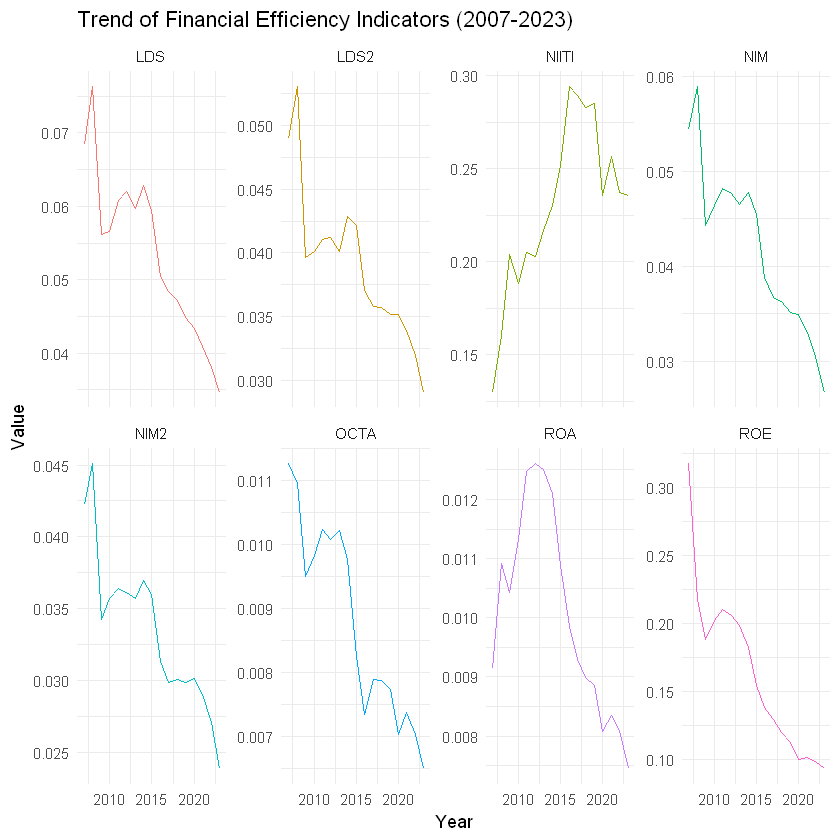

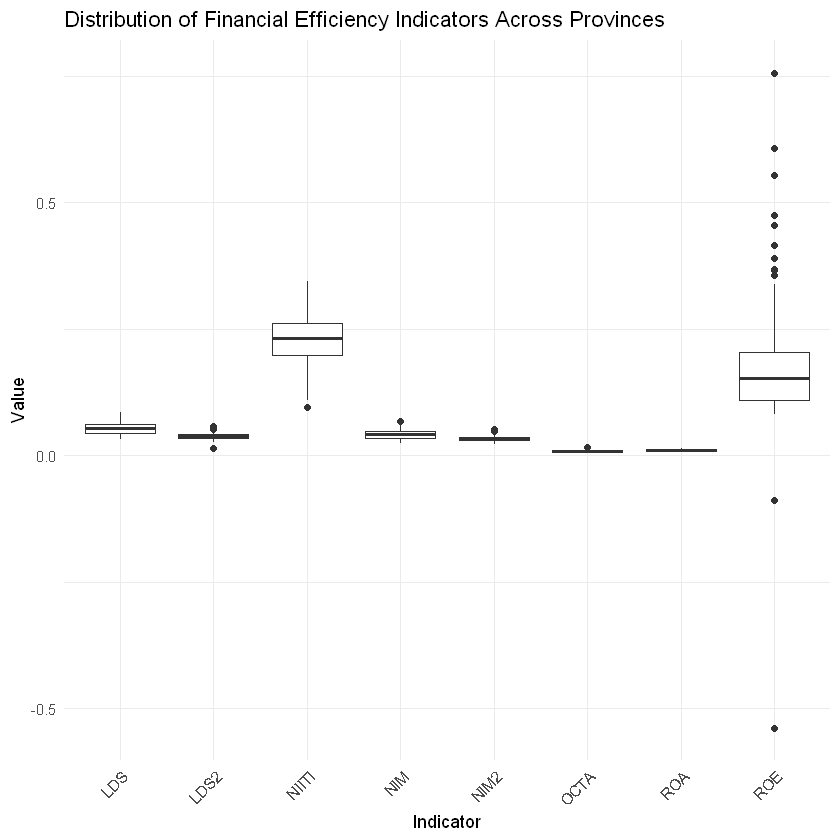

[1] "Summary Statistics:"
# A tibble: 1 × 32
  NIM_mean  NIM_sd NIM_min NIM_max NIM2_mean NIM2_sd NIM2_min NIM2_max LDS_mean
     <dbl>   <dbl>   <dbl>   <dbl>     <dbl>   <dbl>    <dbl>    <dbl>    <dbl>
1   0.0419 0.00881  0.0250  0.0671    0.0335 0.00550   0.0222   0.0515   0.0536
# ℹ 23 more variables: LDS_sd <dbl>, LDS_min <dbl>, LDS_max <dbl>,
#   LDS2_mean <dbl>, LDS2_sd <dbl>, LDS2_min <dbl>, LDS2_max <dbl>,
#   NIITI_mean <dbl>, NIITI_sd <dbl>, NIITI_min <dbl>, NIITI_max <dbl>,
#   OCTA_mean <dbl>, OCTA_sd <dbl>, OCTA_min <dbl>, OCTA_max <dbl>,
#   ROA_mean <dbl>, ROA_sd <dbl>, ROA_min <dbl>, ROA_max <dbl>, ROE_mean <dbl>,
#   ROE_sd <dbl>, ROE_min <dbl>, ROE_max <dbl>
[1] "Top 5 Provinces for Each Indicator:"
# A tibble: 40 × 3
# Groups:   Indicator [8]
   Province       Indicator  Value
   <chr>          <chr>      <dbl>
 1 贵州省         LDS       0.0586
 2 重庆市         LDS       0.0560
 3 西藏自治区     LDS       0.0557
 4 宁夏回族自治区 LDS       0.0556
 5 山东省         LDS       0.0549
 6

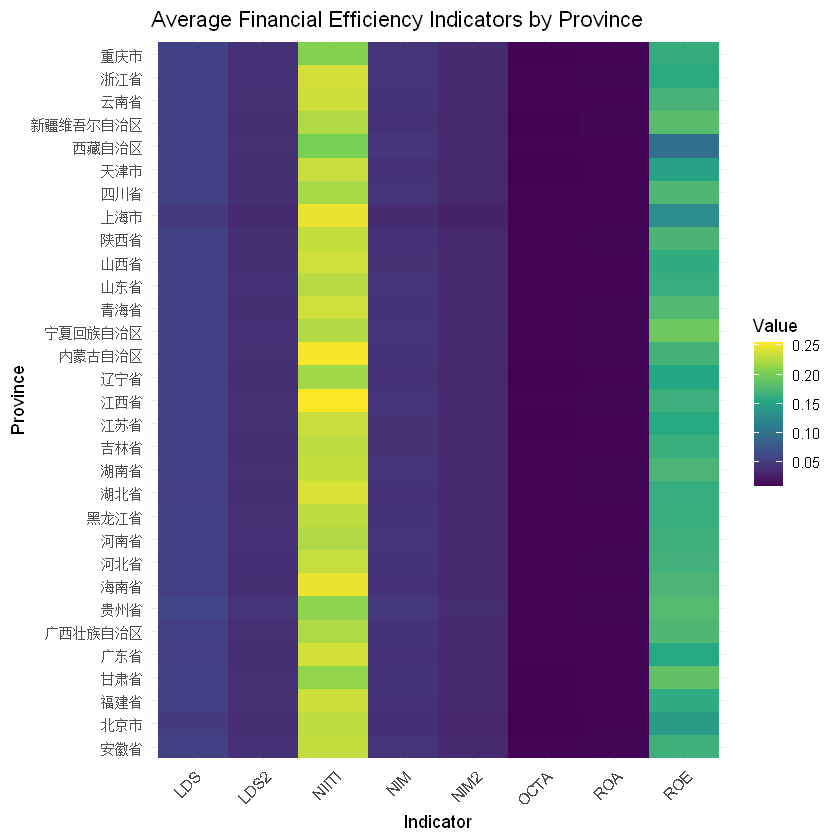

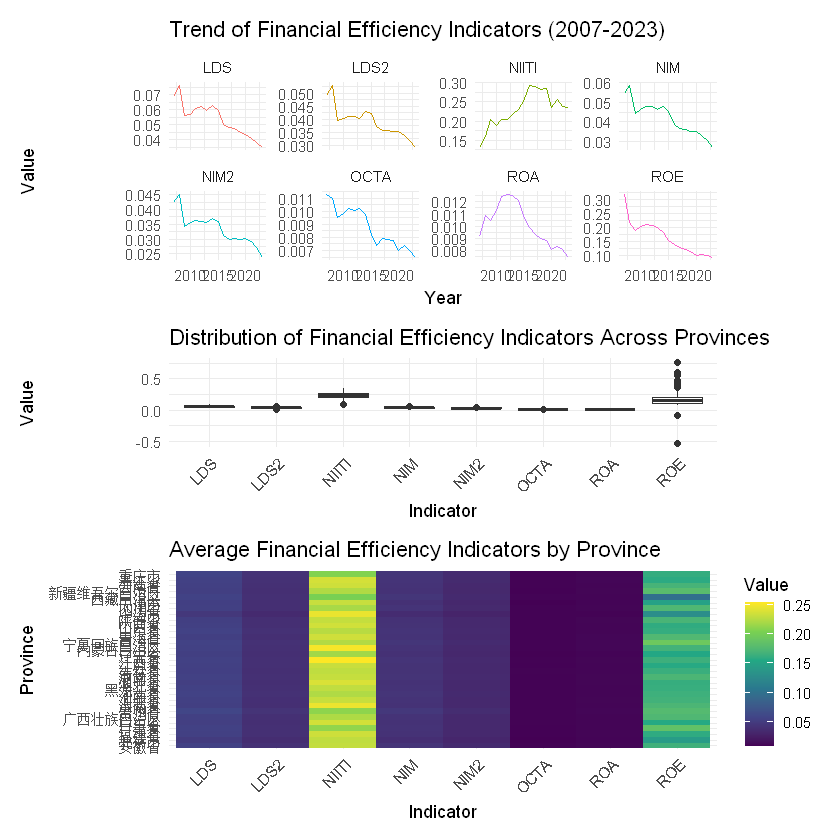

In [230]:
# 1. Overall trend of indicators over time
trend_plot <- summarized_all_banks_indicators %>%
  group_by(year) %>%
  summarise(across(all_of(new_indicators), \(x) mean(x, na.rm = TRUE))) %>%
  pivot_longer(cols = all_of(new_indicators), names_to = "Indicator", values_to = "Value") %>%
  ggplot(aes(x = year, y = Value, color = Indicator)) +
  geom_line() +
  facet_wrap(~Indicator, scales = "free_y", nrow = 2) +
  theme_minimal() +
  labs(title = "Trend of Financial Efficiency Indicators (2007-2023)",
       x = "Year", y = "Value") +
  theme(legend.position = "none")

# 2. Boxplot of indicators distribution across provinces
boxplot <- summarized_all_banks_indicators %>%
  pivot_longer(cols = all_of(new_indicators), names_to = "Indicator", values_to = "Value") %>%
  ggplot(aes(x = Indicator, y = Value)) +
  geom_boxplot() +
  theme_minimal() +
  labs(title = "Distribution of Financial Efficiency Indicators Across Provinces",
       x = "Indicator", y = "Value") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 3. Heatmap of average indicators by province
heatmap_data <- summarized_all_banks_indicators %>%
  group_by(Province) %>%
  summarise(across(all_of(new_indicators), \(x) mean(x, na.rm = TRUE))) %>%
  pivot_longer(cols = all_of(new_indicators), names_to = "Indicator", values_to = "Value")

heatmap <- ggplot(heatmap_data, aes(x = Indicator, y = Province, fill = Value)) +
  geom_tile() +
  scale_fill_viridis_c() +
  theme_minimal() +
  labs(title = "Average Financial Efficiency Indicators by Province",
       x = "Indicator", y = "Province") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 4. Summary statistics table
summary_stats <- summarized_all_banks_indicators %>%
  summarise(across(all_of(new_indicators), 
                   list(mean = \(x) mean(x, na.rm = TRUE),
                        sd = \(x) sd(x, na.rm = TRUE),
                        min = \(x) min(x, na.rm = TRUE),
                        max = \(x) max(x, na.rm = TRUE))))

# 5. Top 5 provinces for each indicator
top_provinces <- summarized_all_banks_indicators %>%
  group_by(Province) %>%
  summarise(across(all_of(new_indicators), \(x) mean(x, na.rm = TRUE))) %>%
  pivot_longer(cols = all_of(new_indicators), names_to = "Indicator", values_to = "Value") %>%
  group_by(Indicator) %>%
  top_n(5, Value) %>%
  arrange(Indicator, desc(Value))

# Display results
print(trend_plot)
print(boxplot)
print(heatmap)
print("Summary Statistics:")
print(summary_stats)
print("Top 5 Provinces for Each Indicator:")
print(top_provinces)

# Combine plots
combined_plot <- trend_plot + boxplot + heatmap +
  plot_layout(ncol = 1, heights = c(2, 1, 2))
print(combined_plot)
